In [1]:
import sys
import os
import uproot
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import numpy as np
import pandas as pd
import awkward as ak
import random
import math

In [135]:
pd.set_option('display.max_columns', None)
pd.options.display.width = 1000

In [59]:
# Set up the file paths for all of the files

file_data = {
    'Nue':{
        '9':{
            'directory':'DetVar/mcc9_run1/',
            'index':[5,6,7,8,9],
            'plot_labels':[
                "LYAttenuation",
                "LYDown",
                "LYRayleigh",
                "recomb2",
                "sce",
                "Scale X",
                "Scale YZ",
                "Angle XZ",
                "Angle YZ",
                "Central Value"
            ],
            'variation_titles':[
                "LYAttenuation",
                "LYDown",
                "LYRayleigh",
                "recomb2",
                "sce",
                "wiremod_ScaleX",
                "wiremod_ScaleYZ",
                "WireModAngleXZ",
                "WireModAngleYZ",
                "CV"
            ],
            'file_names':[
                "prodgenie_bnb_intrinsic_nue_overlay_DetVar_LYAttenuation_v08_00_00_38_run1_reco2_reco2.root",
                "prodgenie_bnb_intrinsic_nue_overlay_DetVar_LYDown_v08_00_00_37_run1_reco2_reco2.root",
                "prodgenie_bnb_intrinsic_nue_overlay_DetVar_LYRayleigh_v08_00_00_37_run1_reco2_reco2.root",
                "prodgenie_bnb_intrinsic_nue_overlay_detvar_recomb2_reco2_run1_reco2_reco2.root",
                "prodgenie_bnb_intrinsic_nue_overlay_detvar_sce_reco2_run1_reco2_reco2.root",
                "prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleX_v08_00_00_42_run1_reco2_reco2.root",
                "prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_42_run1_reco2_reco2.root",
                "prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleXZ_v08_00_00_42_run1_reco2_reco2.root",
                "prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleYZ_v08_00_00_42_run1_reco2_reco2.root",
                "prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root"
            ]
        },
        '9.10':{
            'directory':'DetVar/v01/',
            'index':[1,2,3,4,7],
            'plot_labels':[ 
                    'sce', 
                    'Scale dEdX', 
                    'Scale X', 
                    'Scale YZ', 
                    'Angle XZ', 
                    'Angle YZ',
                    'Scale X (10%)',
                    'Central Value'
                   ],
            'variation_titles':[ 
                    'sce', 
                    'wiremod_ScaledEdX', 
                    'wiremod_ScaleX', 
                    'wiremod_ScaleYZ', 
                    'WireModAngleXZ', 
                    'WireModAngleYZ',
                    'wiremod_ScaleX (10%)',
                    'CV'
                   ],
            'file_names':[
              'prodgenie_bnb_intrinsic_nue_overlay_detvar_sce_reco2_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaledEdX_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleX_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleXZ_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleYZ_v08_00_00_42_run1_reco2_reco2.root',
              'dontuse_____prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleX_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root'
             ]
        }
    },
    'Pi0':{
        '9':{
            'directory':'DetVar/mcc9_run3b/',
            'index':[4,5,6,7,9],
            'plot_labels':[
                "LY Down",
                "LY Reyliegh",
                "Recombination 2",
                "SCE",
                "Scale X",
                "Scale YZ",
                "Angle XZ",
                "Angle YZ",
                "LY Attenuation",
                "Central Value"
            ],
            'variation_titles':[
                "LYDown",
                "LYReyliegh",
                "Recomb2",
                "SCE",
                "wiremod_ScaleX",
                "wiremod_ScaleYZ",
                "WireModAngleXZ",
                "WireModAngleYZ",
                "LYAttenuation",
                "CV"
            ],
            'file_names':[
                "prodgenie_nc_pi0_overlay_DetVar_LYDown_v08_00_00_37_run3b_reco2_reco2.root",
                "prodgenie_nc_pi0_overlay_DetVar_LYReyliegh_v08_00_00_37_run3b_reco2_reco2.root",
                "prodgenie_nc_pi0_overlay_DetVar_Recomb2_reco2_v08_00_00_39_run3b_reco2_reco2_ntuples.root",
                "prodgenie_nc_pi0_overlay_DetVar_SCE_reco2_v08_00_00_38_run3b_reco2_reco2.root",
                "prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3b_reco2_reco2.root",
                "prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root",
                "prodgenie_nc_pi0_overlay_DetVar_WireModAngleXZ_v08_00_00_38_run3b_reco2_reco2_ntuples.root",
                "prodgenie_nc_pi0_overlay_DetVar_WireModAngleYZ_v08_00_00_38_run3b_reco2_reco2.root",
                "prodgenie_NCPi0_overlay_DetVar_LYAttenuation_v08_00_00_38_run3b_reco2_reco2_ntuples.root",
                "prodgenie_nc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root"
            ]
        },
        '9.10':{
            'directory':'DetVar/v00/',
            'index':[1,2,4,5,6],
            'plot_labels':[ 
                    'sce', 
                    'Scale dEdX', 
                    'Scale X', 
                    'Scale YZ', 
                    'Angle XZ', 
                    'Angle YZ',
                    'Central Value'
                   ],
            'variation_titles':[
                    'sce', 
                    'wiremod_ScaledEdX', 
                    'wiremod_ScaleX', 
                    'wiremod_ScaleYZ', 
                    'WireModAngleXZ', 
                    'WireModAngleYZ',
                    'CV', 
                   ],
            'file_names':[
              'prodgenie_nc_pi0_overlay_DetVar_SCE_reco2_v08_00_00_38_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaledEdX_v08_00_00_39_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_WireModAngleXZ_v08_00_00_38_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_WireModAngleYZ_v08_00_00_38_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3a_reco2_reco2.root',
             ]

        }
    }
}

configs = [('Nue', '9.10'), ('Nue', '9')] # List of (mode, version) pairs
primary_config_index = 0

# Lists for all of the configurations
file_names_all = []
variation_titles_all = []
plot_labels_all = []

# Lists for just the primary configuration
file_names = []
variation_titles = []
plot_labels = []
for i, (mode, version) in enumerate(configs):
    index = file_data[mode][version]['index']
    directory = file_data[mode][version]['directory']
    
    for j in index:
        file_names_all.append(directory + file_data[mode][version]['file_names'][j])
        variation_titles_all.append(file_data[mode][version]['variation_titles'][j])
        plot_labels_all.append(file_data[mode][version]['plot_labels'][j])
        
        if i == primary_config_index:
            file_names.append(directory + file_data[mode][version]['file_names'][j])
            variation_titles.append(file_data[mode][version]['variation_titles'][j])
            plot_labels.append(file_data[mode][version]['plot_labels'][j])
  


## Set Up and Load the DataFrame

In [5]:
# List of variables to include in the DataFrame

# variables = ['selected', 'evt', 'sub', 'run', 'nslice', 'shr_energy_tot_cali','_opfilter_pe_beam',
#              '_opfilter_pe_veto','slice_orig_pass_id','n_tracks_contained', 'truthFiducial', 'npi0', 'elec_e',
#             'CosmicIPAll3D', 'hits_ratio', 'shrmoliereavg', 'subcluster', 'trkfit', 'tksh_distance', #'shr_tkfit_nhits_tot',
#             'shr_tkfit_dedx_max', 'n_showers_contained', 'shr_tkfit_nhits_Y', 'shr_tkfit_nhits_U', 'shr_tkfit_nhits_V']

# Other useful variables that I want to plot
variables = ['evt', 'run', 'sub', 'truthFiducial', 'npi0', 'elec_e', 
             'shr_tkfit_nhits_Y', 'shr_tkfit_nhits_U', 'shr_tkfit_nhits_V',
             'shr_tkfit_dedx_Y', 'shr_tkfit_dedx_U', 'shr_tkfit_dedx_V',
             'true_nu_vtx_x', 'true_nu_vtx_y', 'true_nu_vtx_z', 'reco_e'
            ] # Variables for mcc9.10
variables_mcc9 = variables[:] # Copy of variables that are valid for mcc9
variables.append('slice_orig_pass_id')

# These variables are calculated from the initial loading of the DataFrame, so should be included in the total list until later
added_vars = ['shr_tkfit_nhits_tot', 'trkpid', 'slcng2_total', 'clung2_total']
added_vars_mcc9 = added_vars[:]
added_vars.append('trksemlbl')

# Separate out the variables used for the loose cuts for clarity
new_loose_cut_variables = [
    'nslice',
    'selected',
    'shr_energy_tot_cali', # total energy in the shower
    '_opfilter_pe_beam',
    '_opfilter_pe_veto',
    'n_tracks_contained', # number of tracks
    'CosmicIPAll3D',
    'hits_ratio',
    'shrmoliereavg', # shower molier angle
    'subcluster',
    'trkfit',
    'tksh_distance',
    'shr_tkfit_nhits_tot', # number of hits in the shower (combined between all planes)
    'shr_tkfit_dedx_max', # energy deposition rate at beginning of the shower
    'n_showers_contained'
]
new_loose_cut_variables_mcc9 = new_loose_cut_variables[:]
new_loose_cut_variables.append('trksemlbl') # how track like the shower is

# (MIP/HIP/shower/Michel/diffuse)
nugraph_variables = [
    'slcng2mip', 'slcng2hip', 'slcng2shr', 'slcng2mcl', 'slcng2dfs', 'slcng2bkg', # nu graph slice hit counts for each semantic label and for background
    'clung2mip', 'clung2hip', 'clung2shr', 'clung2mcl', 'clung2dfs', 'clung2bkg', # nu graph hit count of hits in PFPs (i.e. clustered) for each semantic label and for background
    'nhits_r1cm', 'nhits_r3cm', 'nhits_r5cm', 'nhits_r10cm', # total number of hits within 1/3/5/10 cm of neutrino vertex
    'ng2hip_r1cm', 'ng2hip_r3cm', 'ng2hip_r5cm', 'ng2hip_r10cm', # number of HIP-labeled hits within 1/3/5/10 cm of neutrino vertex
    'ng2clu_hip_r1cm', 'ng2clu_hip_r3cm', 'ng2clu_hip_r5cm', 'ng2clu_hip_r10cm', # number of HIP-labeled hits within 1/3/5/10 cm of neutrino vertex that are clustered in PFPs
    'ng2clu_hippfp_r1cm', 'ng2clu_hippfp_r3cm', 'ng2clu_hippfp_r5cm', 'ng2clu_hippfp_r10cm', # number of HIP-labeled hits within 1/3/5/10 cm of neutrino vertex that are clustered in a HIP-labeled PFPs 
#     'pfng2hip_r1cm', 'pfng2hip_r3cm', 'pfng2hip_r5cm', 'pfng2hip_r10cm' # number of HIP-labeled hits within 1/3/5/10 cm of neutrino vertex in each PFP (commenting since a vector)
]

# Combine the variables into a array for loading the DataFrame
variables.extend(new_loose_cut_variables)
variables_mcc9.extend(new_loose_cut_variables_mcc9)
variables.extend(nugraph_variables)
variables = list(set([var for var in variables if var not in added_vars]))
variables_mcc9 = list(set([var for var in variables_mcc9 if var not in added_vars_mcc9]))
# variables = list(np.unique(np.array(variables)))

variables

['clung2shr',
 'slcng2bkg',
 'ng2hip_r3cm',
 'shr_tkfit_dedx_Y',
 'clung2bkg',
 'ng2clu_hip_r3cm',
 'ng2clu_hip_r10cm',
 'slcng2shr',
 'reco_e',
 'nhits_r3cm',
 'ng2clu_hip_r5cm',
 'true_nu_vtx_y',
 'nhits_r1cm',
 'true_nu_vtx_x',
 'clung2hip',
 'ng2hip_r10cm',
 'slcng2mip',
 '_opfilter_pe_beam',
 'n_tracks_contained',
 'tksh_distance',
 'ng2clu_hippfp_r1cm',
 'truthFiducial',
 'ng2clu_hip_r1cm',
 'npi0',
 'slcng2hip',
 'shr_tkfit_dedx_V',
 'ng2clu_hippfp_r10cm',
 'n_showers_contained',
 'clung2dfs',
 'shrmoliereavg',
 'slcng2dfs',
 'shr_tkfit_dedx_max',
 'clung2mip',
 'run',
 'nhits_r5cm',
 'hits_ratio',
 'ng2clu_hippfp_r5cm',
 'ng2hip_r5cm',
 'nslice',
 'slice_orig_pass_id',
 'shr_tkfit_dedx_U',
 'sub',
 'true_nu_vtx_z',
 'elec_e',
 'CosmicIPAll3D',
 'selected',
 'ng2clu_hippfp_r3cm',
 'shr_tkfit_nhits_Y',
 'shr_tkfit_nhits_U',
 'shr_tkfit_nhits_V',
 '_opfilter_pe_veto',
 'clung2mcl',
 'shr_energy_tot_cali',
 'subcluster',
 'nhits_r10cm',
 'evt',
 'slcng2mcl',
 'ng2hip_r1cm',
 'trkfi

In [6]:
# Load one file for easier viewing
t = uproot.open('DetVar/v01/prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root')['nuselection']['NeutrinoSelectionFilter']
df = t.arrays(variables, library="pd")
df.sort_values(by=['run','evt'])
# df = df.drop_duplicates()

# print(df.index)

# df['ident_id'] = df['run'] * 1000000 + df['sub']*10000 + df['evt']
# #     df = df.droplevel('subentry')
# df = df.set_index('ident_id')
# df = df.drop_duplicates()

# print(df.index)
# print(df.index.is_unique)
# print(df.loc[:,['run', 'sub', 'evt']])
# print(df)

,clung2shr,slcng2bkg,ng2hip_r3cm,shr_tkfit_dedx_Y,clung2bkg,ng2clu_hip_r3cm,ng2clu_hip_r10cm,slcng2shr,reco_e,nhits_r3cm,...,shr_tkfit_nhits_V,_opfilter_pe_veto,clung2mcl,shr_energy_tot_cali,subcluster,nhits_r10cm,evt,slcng2mcl,ng2hip_r1cm,trkfit
26905,-2147483648,-2147483648,-2147483648,-3.402823e+38,-2147483648,-2147483648,-2147483648,-2147483648,0.000000,-2147483648,...,0,0.0,-2147483648,0.000000,2147483648,-2147483648,3371,-2147483648,-2147483648,1.000000
26906,164,0,0,1.834861e+00,0,0,0,240,0.137907,17,...,0,0.0,1,0.114463,8,45,3380,1,0,0.110619
26907,-2147483648,-2147483648,-2147483648,-3.402823e+38,-2147483648,-2147483648,-2147483648,-2147483648,0.000000,-2147483648,...,0,0.0,-2147483648,0.000000,2147483648,-2147483648,3387,-2147483648,-2147483648,1.000000
26908,1214,18,0,2.030725e+00,15,0,0,1340,1.111284,29,...,5,0.0,2,0.922366,19,88,3390,2,0,0.347054
14233,56,3,4,2.858172e+00,1,4,8,82,0.082378,23,...,10,0.0,0,0.033863,3,80,2527,0,4,0.660714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80162,235,45,37,1.869079e+00,1,9,9,312,0.233407,62,...,4,0.0,0,0.155026,12,210,1962,17,16,0.218837
80163,0,39,41,-3.402823e+38,4,8,8,994,0.000000,78,...,0,0.0,0,0.000000,2147483648,269,1969,1,7,1.000000
80164,34,0,46,-3.402823e+38,0,44,64,256,0.295670,70,...,0,0.0,22,0.000000,2147483648,191,1975,26,16,1.000000
80165,829,10,37,5.868633e+00,9,32,33,961,0.653824,60,...,0,0.0,30,0.447161,19,190,1980,31,17,0.068404


In [7]:
t.keys()

['selected',
 'run',
 'sub',
 'evt',
 'trk_id',
 'shr_id',
 'trk2_id',
 'shr2_id',
 'trk3_id',
 'shr3_id',
 'shr_energy_tot',
 'shr_energy',
 'shr_energy_second',
 'shr_energy_third',
 'shr_energy_tot_cali',
 'shr_energy_cali',
 'shr_energy_second_cali',
 'shr_energy_third_cali',
 'shr_theta',
 'shr_phi',
 'shr_pca_0',
 'shr_pca_1',
 'shr_pca_2',
 'shr_px',
 'shr_py',
 'shr_pz',
 'shr_openangle',
 'shr_tkfit_start_x',
 'shr_tkfit_start_y',
 'shr_tkfit_start_z',
 'shr_tkfit_theta',
 'shr_tkfit_phi',
 'shr_start_x',
 'shr_start_y',
 'shr_start_z',
 'shr_dedx_Y',
 'shr_dedx_V',
 'shr_dedx_U',
 'shr_dedx_Y_cali',
 'shr_dedx_V_cali',
 'shr_dedx_U_cali',
 'shr_tkfit_dedx_Y',
 'shr_tkfit_dedx_V',
 'shr_tkfit_dedx_U',
 'shr_tkfit_dedx_max',
 'shr_tkfit_nhits_Y',
 'shr_tkfit_nhits_V',
 'shr_tkfit_nhits_U',
 'shr_llrpid_dedx_Y',
 'shr_llrpid_dedx_V',
 'shr_llrpid_dedx_U',
 'shr_llrpid_dedx',
 'shr_tkfit_dedx_Y_alt',
 'shr_tkfit_dedx_V_alt',
 'shr_tkfit_dedx_U_alt',
 'shr_tkfit_nhits_Y_alt',
 'sh

In [8]:
# Utility functions

def get_elm_from_vec_idx(myvec, idx, fillval=np.nan):
    """Returns the element of a vector at position idx, where idx is a vector of indices. If idx is out of bounds, returns a filler value"""
    return np.array([pidv[tid] if ((tid < len(pidv)) & (tid >= 0)) else fillval for pidv, tid in zip(myvec, idx)])

def get_idx_from_vec_sort(argidx, vecsort, mask):
    """Returns the index of the element of a vector at position argidx, where argidx is a vector of indices. If argidx is out of bounds, returns -1."""
    vid = vecsort[mask]
    sizecheck = argidx if argidx >= 0 else abs(argidx) - 1
    # find the position in the array after masking
    mskd_pos = [ak.argsort(v)[argidx] if len(v) > sizecheck else -1 for v in vid]
    # go back to the corresponding position in the origin array before masking
    result = [[i for i, n in enumerate(m) if n == 1][p] if (p) >= 0 else -1 for m, p in zip(mask, mskd_pos)]
    return result

In [9]:
# Get all of the DataFrames into a list
# (This is time consuming so try and only do this once)

df_lists = [] # A list that contains the dataframes for each variation separately (df_list[-1] should be CV)

for mode,version in configs:
    
    print(f'loading {mode} ({version}) ...')
    
    df_list = []
    
    index = file_data[mode][version]['index']
    directory = file_data[mode][version]['directory']
    file_names = [directory + file_data[mode][version]['file_names'][i] for i in index]
    
    for file in file_names:
        
        # Loading the DataFrame with all variables required for further analysis and plotting
        t = uproot.open(file)['nuselection']['NeutrinoSelectionFilter']
        if version == '9.10':
            df = t.arrays(variables, library="pd")
        else:
            df = t.arrays(variables_mcc9, library="pd")
        df = df.drop_duplicates()

        # Add unique event identifier as an index to the DataFrame
        df['ident_id'] = df['run'] * 1000000 + df['sub']*10000 + df['evt']
        df = df.set_index('ident_id')

        # Ensure that every event has a unique index (assuming by other logic)
        if not df.index.is_unique:
            raise Exception(f'Index not unique for file: {file}')

        # Add trksemblbl and trkpid to the DataFrame
        if version == '9.10':
            trk_id_o = t.arrays(["trk_id"], library="np")["trk_id"] - 1 #2k sample
            pfng2semlabel = t.arrays(["pfng2semlabel"])["pfng2semlabel"]
            trk_pfng2semlabel_sel = get_elm_from_vec_idx(pfng2semlabel, trk_id_o)
            df["trksemlbl"] = trk_pfng2semlabel_sel

        trk_llr_pid_v = t.arrays(["trk_llr_pid_score_v"])["trk_llr_pid_score_v"]
        trk_id = t.arrays(["trk_id"], library="np")["trk_id"] - 1
        trk_llr_pid_v_sel = get_elm_from_vec_idx(trk_llr_pid_v, trk_id)
        df["trkpid"] = trk_llr_pid_v_sel

        # Add shr_tkfit_nhits_tot to the DataFrame
        df['shr_tkfit_nhits_tot'] = df['shr_tkfit_nhits_Y'] + df['shr_tkfit_nhits_U'] + df['shr_tkfit_nhits_V']

        # Sum the total number of nugraph2 hits in each category
        if version == '9.10':
            df['slcng2_total'] = df['slcng2mip'] + df['slcng2hip'] + df['slcng2shr'] + df['slcng2mcl'] + df['slcng2dfs'] + df['slcng2bkg']
            df['clung2_total'] = df['clung2mip'] + df['clung2hip'] + df['clung2shr'] + df['clung2mcl'] + df['clung2dfs'] + df['clung2bkg']

        # Fix unsigned columns so that differences are two-sided
        # And turn boolean values into integers to allow for subtraction
        uint_cols = np.unique(df.select_dtypes(include=['uint32', 'bool']).columns.to_numpy())
        df[uint_cols] = df[uint_cols].astype('int32')

        df_list.append(df)
    
    df_lists.append(df_list)

loading Nue (9.10) ...
loading Nue (9) ...


In [20]:
# Set up the primary config variables

df_list = df_lists[primary_config_index][:]

## Filter Events and Create Indexes

In [70]:
# Get the shared events and perform cuts
def perform_cuts(config_index = primary_config_index):
    
    print(f'{configs[config_index]}')
    
    version = configs[config_index][0]
    mode = configs[config_index][1]
    
    df_list = df_lists[config_index]

    cv_index = df_list[-1].index # Assume CV is the last in the list

    share_rate = [] # Array to display information about filtering

    # Indexes used for picking out shared events between variations
    shared_index = [] # Contains an index that picks out events shared between each variation and CV that pass the chosen filter (for CV it is all cv events)
    shared_index_all = cv_index # A single index that contains the intersection between all of the indexes that pass the chosen filter
    intersected_index_all = cv_index # A single index contains the intersection between all of the indexes (before any filters)

    # Indexes at different filtering stages used for calculating the cut efficiency and plotting histograms
    before_index = [] # ALL events for each variation that pass this filter
    before_shared_index = [] # Only events that pass this filter in EACH variation and CV
    before_shared_index_all = cv_index # Only events that pass this filter in ALL variations and CV
    before_intersected_index = [] # Only events shared by ALL variations and CV that pass this filter for EACH variation 

    pre_index = []
    pre_shared_index = []
    pre_shared_index_all = cv_index
    pre_intersected_index = []

    cut_index = []
    cut_shared_index = []
    cut_shared_index_all = cv_index
    cut_intersected_index = []

    for i in range(len(df_list)):

        # Section
        intersected_index_all = intersected_index_all.intersection(df_list[i].index)

        # Filter out specific events of interest
        df_before = df_list[i]
        df_before = df_before[df_before['truthFiducial'] == True] 
        if mode == 'Nue': df_before = df_before[df_before['npi0'] == 0]
        if mode == 'Pi0': df_before = df_before[df_before['npi0'] > 0]
        cv_before = df_list[-1]
        cv_before = cv_before[cv_before['truthFiducial'] == True]
        if mode == 'Nue': cv_before = cv_before[cv_before['npi0'] == 0]
        if mode == 'Pi0': cv_before = cv_before[cv_before['npi0'] > 0]

        before_index.append(df_before.index)
        before_shared_index.append(df_before.index.intersection(cv_before.index))
        before_shared_index_all = before_shared_index_all.intersection(df_before.index)

        # Perform Preselection
        df_pre = df_before
        df_pre = df_pre[df_pre['nslice'] == 1] 
        df_pre = df_pre[df_pre['selected'] == 1]
        df_pre = df_pre[df_pre['shr_energy_tot_cali'] > 0.07]
        df_pre = df_pre[(df_pre['_opfilter_pe_beam'] > 0) & (df_pre['_opfilter_pe_veto'] < 20)]
    #     df_pre = df_pre[df_pre['n_showers_contained'] == 1]
        cv_pre = cv_before
        cv_pre = cv_pre[cv_pre['nslice'] == 1] 
        cv_pre = cv_pre[cv_pre['selected'] == 1] 
        cv_pre = cv_pre[cv_pre['shr_energy_tot_cali'] > 0.07] 
        cv_pre = cv_pre[(cv_pre['_opfilter_pe_beam'] > 0) & (cv_pre['_opfilter_pe_veto'] < 20)] 
    #     cv_pre = cv_pre[cv_pre['n_showers_contained'] == 1]

        pre_index.append(df_pre.index)
        pre_shared_index.append(df_pre.index.intersection(cv_pre.index))
        pre_shared_index_all = pre_shared_index_all.intersection(df_pre.index)

        # Perform cuts
        df_cut = df_pre
        df_cut = df_cut[df_cut['n_tracks_contained'] > 0] # cut to separate Np and 0p
        df_cut = df_cut[df_cut['CosmicIPAll3D'] > 10]
        if version == '9.10': df_cut = df_cut[df_cut['trksemlbl'] == 1]
        df_cut = df_cut[df_cut['hits_ratio'] > 0.40]
        df_cut = df_cut[df_cut['shrmoliereavg'] < 22]
        df_cut = df_cut[df_cut['subcluster'] > 4]
        df_cut = df_cut[df_cut['trkfit'] < 0.5]
        df_cut = df_cut[df_cut['tksh_distance'] < 4.0]
        df_cut = df_cut[df_cut['shr_tkfit_nhits_tot'] > 1]
        df_cut = df_cut[df_cut['shr_tkfit_dedx_max'] > 1]
        df_cut = df_cut[df_cut['shr_tkfit_dedx_max'] < 3]
        df_cut = df_cut[df_cut['n_showers_contained'] == 1]
        cv_cut = cv_pre
        cv_cut = cv_cut[cv_cut['n_tracks_contained'] > 0] # cut to separate Np and 0p
        cv_cut = cv_cut[cv_cut['CosmicIPAll3D'] > 10]
        if version == '9.10': cv_cut = cv_cut[cv_cut['trksemlbl'] == 1]
        cv_cut = cv_cut[cv_cut['hits_ratio'] > 0.40]
        cv_cut = cv_cut[cv_cut['shrmoliereavg'] < 22]
        cv_cut = cv_cut[cv_cut['subcluster'] > 4]
        cv_cut = cv_cut[cv_cut['trkfit'] < 0.5]
        cv_cut = cv_cut[cv_cut['tksh_distance'] < 4.0]
        cv_cut = cv_cut[cv_cut['shr_tkfit_nhits_tot'] > 1]
        cv_cut = cv_cut[cv_cut['shr_tkfit_dedx_max'] > 1]
        cv_cut = cv_cut[cv_cut['shr_tkfit_dedx_max'] < 3]
        cv_cut = cv_cut[cv_cut['n_showers_contained'] == 1]

        cut_index.append(df_cut.index)
        cut_shared_index.append(df_cut.index.intersection(cv_cut.index))
        cut_shared_index_all = cut_shared_index_all.intersection(df_cut.index)

        # Calculate the percentage of events shared after pre-selection
        num_total_events = len(before_index[i])
        num_shared_events = len(pre_shared_index[i])
        share_rate.append(num_shared_events / num_total_events)

    # Use a second loop to populate the portions of the shared set that pass each filter
    for i in range(len(df_list)):
        before_intersected_index.append(before_index[i].intersection(intersected_index_all))
        pre_intersected_index.append(pre_index[i].intersection(intersected_index_all))
        cut_intersected_index.append(cut_index[i].intersection(intersected_index_all))    

    print(f'Before any filtering: {[len(df.index) for df in df_list]}')
    print(f'After basic filtering: {[len(index) for index in before_index]}')
    print(f'After pre-selection: {[len(index) for index in pre_index]}')
    print(f'After cuts: {[len(index) for index in cut_index]}')
    print(f'After pre-selection, the ratio of shared events between DetVar and CV is:\n{share_rate}')

    
    
    return intersected_index_all, before_index, before_shared_index, before_shared_index_all, before_intersected_index, pre_index, pre_shared_index, pre_shared_index_all, pre_intersected_index, cut_index, cut_shared_index, cut_shared_index_all, cut_intersected_index




In [124]:
intersected_index_all, before_index, before_shared_index, before_shared_index_all, before_intersected_index, pre_index, pre_shared_index, pre_shared_index_all, pre_intersected_index, cut_index, cut_shared_index, cut_shared_index_all, cut_intersected_index = perform_cuts()

# Pick the default choice for shared_index (this can be overrided by using the specific array instead)
shared_index = pre_shared_index # Contains an index that picks out events shared between each variation and CV (for CV it is all cv events)
shared_index_all = pre_shared_index_all # A single index that contains the union between all of the indexes
    
print(f'Based on choice of filtering, {len(shared_index_all)} events are shared between all variations')

('Nue', '9.10')
Before any filtering: [82746, 82619, 82615, 83416, 88471]
After basic filtering: [43827, 43807, 43718, 44084, 46817]
After pre-selection: [32950, 32950, 32967, 33246, 35308]
After cuts: [8756, 8889, 8728, 8869, 9437]
After pre-selection, the ratio of shared events between DetVar and CV is:
[0.6765007871859813, 0.6753030337617276, 0.6777299967976577, 0.6866890481807458, 0.7541704936241109]
Based on choice of filtering, 19861 events are shared between all variations


## Utility Functions

In [72]:
# Takes the indices of the desired variations and calculated the relative error of the first from the second
#  var gives the variable to calculate the relative errors for
#  index gives the list of events to look at (defaults to the set defined earlier)
def get_rel_errors(var, index=shared_index):
    rel_errors = []
    for i in range(len(df_list)-1):
        detvar = df_list[i].loc[index[i]][var]
        cv = df_list[-1].loc[index[i]][var]

        relative_error = ( detvar - cv ) / cv

        rel_errors.append(relative_error)
            
    return rel_errors

In [73]:
# Takes an array and returns the relative freqeuncies of items being in the supplied bins
#  The total counts that each bin is divided by is the total number (not just the events that are in the range of the bins)
def get_rel_frequencies(a, bins):
    
    total = len(a)

    hist = np.histogram(np.array(a),bins)[0]
    hist = hist/total # Convert to relative frequency

    return hist

## Set Up Variable to Plot

In [190]:
var_bounds = {
    'hits_ratio': { # name of the variable
        'bins': np.linspace(0, 1, 20), # bin edges for the variables values
        'err_bins': np.linspace(-0.1, 0.1, 24), # bin edges for the relative error in this variable between DetVar and CV
        'limits': [0.40], # values that are used in the cuts
        'limit_tag' : '>', # type of cut (>, =, ...) (only '=' or not '=' matters)
        'special' : [] # variables that should be excluded because they indicate a NaN value (9999, int.max, ...)
    },
    'shr_energy_tot_cali': {
        'bins': np.linspace(0, 2, 30),
        'err_bins': np.linspace(-0.075, 0.075, 24),
        'limits': [0.07],
        'limit_tag' : '>',
        'special' : [9999]
    },
    'shrmoliereavg': {
        'bins': np.linspace(0, 50, 20),
        'err_bins': np.linspace(-1, 1.5, 20),
        'limits': [22],
        'limit_tag' : '<',
        'special' : []
    },
    'shr_tkfit_dedx_max': {
        'bins': np.linspace(0, 10, 20),
        'err_bins': np.linspace(-0.1, 0.1, 24),
        'limits': [1, 3],
        'limit_tag' : '>',
        'special' : [np.finfo(np.float32).min]
    },
    'shr_tkfit_dedx_Y': {
        'bins': np.linspace(0, 10, 20),
        'err_bins': np.linspace(-0.1, 0.1, 24),
        'limits': [1, 3],
        'limit_tag' : '>',
        'special' : []
    },
    'shr_tkfit_dedx_U': {
        'bins': np.linspace(0, 10, 20),
        'err_bins': np.linspace(-0.1, 0.1, 24),
        'limits': [1, 3],
        'limit_tag' : '>',
        'special' : []
    },
    'shr_tkfit_dedx_V': {
        'bins': np.linspace(0, 10, 20),
        'err_bins': np.linspace(-0.1, 0.1, 24),
        'limits': [1, 3],
        'limit_tag' : '>',
        'special' : []
    },
    'n_tracks_contained': {
        'bins': np.linspace(-0.5, 7.5, 9),
        'err_bins': np.linspace(-1, 1.5, 10),
        'limits': [1],
        'limit_tag' : '>',
        'special' : []
    },
    'subcluster': {
        'bins': np.linspace(-0.5, 50.5, 52),
        'err_bins': np.linspace(-1.25, 1.25, 20),
        'limits': [4],
        'limit_tag' : '>',
        'special' : []
    },
    'trkfit': {
        'bins': np.linspace(0, 1, 20),
        'err_bins': np.linspace(-1, 2, 20),
        'limits': [0.5],
        'limit_tag' : '<',
        'special' : []
    },
    'CosmicIPAll3D': {
        'bins': np.linspace(0, 10000, 20),
        'err_bins': np.linspace(-10000, 10000, 20),
        'limits': [0.5],
        'limit_tag' : '>',
        'special' : []
    },
    'n_showers_contained': {
        'bins': np.linspace(-0.5, 8.5, 10),
        'err_bins': np.linspace(-1.25, 1.25, 10),
        'limits': [1],
        'limit_tag' : '==',
        'special' : []
    },
    'tksh_distance': { # Has values at integer limit
        'bins': np.linspace(0, 15, 20),
        'err_bins': np.linspace(-1, 2, 20),
        'limits': [4],
        'limit_tag' : '<',
        'special' : []
    },
    'trksemlbl': {
        'bins': np.linspace(-0.5, 4.5, 6),
        'err_bins': np.linspace(-0.5, 4.5, 6),
        'limits': [1],
        'limit_tag' : '=',
        'special' : []
    },
    '_opfilter_pe_beam': {
        'bins': np.linspace(0, 300, 30),
        'err_bins': np.linspace(-0.25, 0.25, 20),
        'limits': [0],
        'limit_tag' : '>',
        'special' : []
    },
    '_opfilter_pe_veto': {
        'bins': np.linspace(0, 100, 30),
        'err_bins': np.linspace(-1, 1, 20),
        'limits': [20],
        'limit_tag' : '<',
        'special' : []
    },
    'shr_tkfit_nhits_tot': {
        'bins': np.linspace(-0.5, 30.5, 32),
        'err_bins': np.linspace(-1, 2, 20),
        'limits': [20],
        'limit_tag' : '<',
        'special' : []
    },
    'slcng2shr': {
        'bins': np.linspace(0,100,20),
        'err_bins': np.linspace(-0.2, 0.2, 20),
        'limits': [],
        'limit_tag' : '',
        'special' : []
    },
    'ng2hip_r3cm': {
        'bins': np.linspace(0,200,20),
        'err_bins': np.linspace(-0.2, 0.2, 20),
        'limits': [],
        'limit_tag' : '',
        'special' : []
    },
    'ng2hip_r1cm': {
        'bins': np.linspace(0,50,20),
        'err_bins': np.linspace(-0.2, 0.2, 20),
        'limits': [],
        'limit_tag' : '',
        'special' : []
    },
    'ng2clu_hippfp_r3cm': {
        'bins': np.linspace(0,75,20),
        'err_bins': np.linspace(-0.2, 0.2, 20),
        'limits': [],
        'limit_tag' : '',
        'special' : []
    },
    'ng2clu_hippfp_r1cm': {
        'bins': np.linspace(0,30,20),
        'err_bins': np.linspace(-0.2, 0.2, 20),
        'limits': [],
        'limit_tag' : '',
        'special' : []
    },
    'reco_e':{
        'bins': np.linspace(0.0, 5, 20), 
        'err_bins': np.linspace(-1, 1, 20), 
        'limits': [], 
        'limit_tag': '', 
        'special': []
    },
    'elec_e':{
        'bins': np.linspace(0.0, 2.5, 20), 
        'err_bins': np.linspace(-1, 1, 20), 
        'limits': [], 
        'limit_tag': '', 
        'special': []
    }
}

if 'MCC9' not in mode: 
    for nugraph_var in nugraph_variables:
        if nugraph_var not in var_bounds.keys():
            var_bounds[nugraph_var] = {'bins': np.linspace(0,1000,20),
                                        'err_bins': np.linspace(-0.2, 0.2, 20),
                                        'limits': [], 'limit_tag' : '', 'special' : [] }

var = 'shr_tkfit_dedx_max' # Variable 1 used for primary histograms
var2 = 'elec_e' # Variable 2 used for secondary histograms (like sectioning based on first variable)

def getBounds(var): # Wrapper function to define the necessary quanities for plotting histograms for each variable
    
    if var in var_bounds.keys(): # Get the specified values if available
        
        bins = var_bounds[var]['bins']
        err_bins = var_bounds[var]['err_bins']
        limits = var_bounds[var]['limits']
        limit_tag = var_bounds[var]['limit_tag']
        special = var_bounds[var]['special']
        
    else: # Otherwise, automatically determine the bounds for the histograms to be refined by manually adding the variable later
        
        # Determine the min and max values that would appear for each variable
        diff_values = [[error.min(), error.max()] for error in get_rel_errors(var)]
        df_values = [[df[var].min(), df[var].max()] for df in df_list]

        # Take the absolute min and max across all variations to generate binning
        if df_list[-1][var].dtype in ['uint32','int32']: # Different behavior for integer values so bins line up with possibilities
            bin_min = np.round(np.min(df_values))-0.5
            bin_max = np.round(np.max(df_values))+0.5
            bins = np.linspace(bin_min, bin_max, int(bin_max - bin_min + 1))

            err_bin_min = np.round(np.min(diff_values))-0.5
            err_bin_max = np.round(np.max(diff_values))+0.5
            err_bins = np.linspace(err_bin_min, err_bin_max, int(err_bin_max - err_bin_min + 1))
        else:
            bins = np.linspace(np.min(df_values), np.max(df_values),20)
            err_bins = np.linspace(np.min(diff_values), np.max(df_values),20)

        # Default to empty limits and special values
        limits = []
        limit_tag = ''
        special = []
        
        # Print out what would need to be added to var_bounds
        print(f"""'{var}':{{
    'bins': np.linspace({min(bins)}, {max(bins)}, {len(bins)}), 
    'err_bins': np.linspace({min(err_bins)}, {max(err_bins)}, {len(err_bins)}), 
    'limits': [], 
    'limit_tag': '', 
    'special': []
}}""")
    
    # Calculate the bin centers and widths for convenience later
    bin_centers = (bins[:-1]+bins[1:])/2
    bin_width = bins[1]-bins[0]

    err_bin_centers = (err_bins[:-1]+err_bins[1:])/2
    err_bin_width = err_bins[1]-err_bins[0]
        
    return bins, err_bins, limits, limit_tag, special, bin_centers, bin_width, err_bin_centers, err_bin_width

bins, err_bins, limits, limit_tag, special, bin_centers, bin_width, err_bin_centers, err_bin_width = getBounds(var)
bins2, err_bins2, limits2, limit_tag2, special2, bin_centers2, bin_width2, err_bin_centers2, err_bin_width2 = getBounds(var2)

# Make sure inf values are excluded always
default_special = [np.finfo(np.float32).min, np.finfo(np.float32).max, np.iinfo(np.int32).min, np.iinfo(np.int32).max, 3.4024083e+38, -3.4024083e+38]


special.extend(default_special)
special2.extend(default_special)


## Remove special values from shared_index

In [191]:
# Filter out the special values that shouldn't count in averages or other quantities like covariance
#  index and index_all are indexes like shared_index (list of indexes) and shared_index_all (single index)
#  var_list is a list of variable names
#  special can be specified as a list of values to filter if a variable isn't in var_bounds
#  na says whether to remove NaN values as well as anything in special (can't put nan in special since it never equates to True)

def filter_index(index, index_all, var_list, special = default_special, na=True, exponent_threshold=10, variation_index=None):

    filtered_shared_index = index[:]
    filtered_shared_index_all = index_all
    
    for var_temp in var_list:
        
        if var_temp not in variables:
            continue
        
        # Determine the values to filter
        if var_temp in var_bounds.keys():
            special_temp = var_bounds[var_temp]['special']    
        elif special.len(special) == len(var_list):
            special_temp = special[var_list.index(var_temp)]
        elif special:       
            special_temp = special  
        else:
            special_temp = []

        for i in range(len(df_list)-1):
            
            if variation_index and i != variation_index:
                continue

            cv_share = df_list[-1].loc[index[i]]
            detvar_share = df_list[i].loc[index[i]]

            filtered_shared_index[i] = filtered_shared_index[i].intersection(cv_share[~cv_share[var_temp].isin(special_temp)].index)
            filtered_shared_index[i] = filtered_shared_index[i].intersection(detvar_share[~detvar_share[var_temp].isin(special_temp)].index)  

            if na:
                
                filtered_shared_index[i] = cv_share.loc[filtered_shared_index[i]].dropna(subset=[var_temp]).index
                filtered_shared_index[i] = detvar_share.loc[filtered_shared_index[i]].dropna(subset=[var_temp]).index
                
            filtered_shared_index[i] = filtered_shared_index[i].intersection(cv_share[cv_share[var_temp] < 10**exponent_threshold].index)
            filtered_shared_index[i] = filtered_shared_index[i].intersection(cv_share[cv_share[var_temp] > -10**exponent_threshold].index)
            filtered_shared_index[i] = filtered_shared_index[i].intersection(detvar_share[detvar_share[var_temp] < 10**exponent_threshold].index) 
            filtered_shared_index[i] = filtered_shared_index[i].intersection(detvar_share[detvar_share[var_temp] > -10**exponent_threshold].index)  
            
            filtered_shared_index_all = index_all.intersection(filtered_shared_index[i])
        
    return filtered_shared_index[:], filtered_shared_index_all

In [192]:
filtered_shared_index, filtered_shared_index_all = filter_index(shared_index, shared_index_all, [var, var2], special = [special, special2])
# print(df_list[1].loc[filtered_shared_index[1]])

## Section Off Outliers in the First Variable

In [193]:
sectioned_index = [] # Contains the events in EACH variation that are considered outliers

section_label = '<>' # Which direction from the diagonal to section off (>, <, <>, =)
section_value = 0.3 # What percentage of the max bin range do outliers need to be from the diagonal

for i in range(len(df_list)-1):

    detvar = df_list[i].loc[shared_index[i]][var]
    cv = df_list[-1].loc[shared_index[i]][var]

#     error = ( detvar - cv ) / cv
    error = (detvar - cv)/np.max(bins)

    if section_label == '>':
        new_index = df_list[i].loc[shared_index[i]][error > section_value].index
    elif section_label == '<':
        new_index = df_list[i].loc[shared_index[i]][error < section_value].index
    elif section_label == '<>':
        new_index = df_list[i].loc[shared_index[i]][error < -1*section_value].index
        new_index = new_index.union(df_list[i].loc[shared_index[i]][error > section_value].index)
    elif section_label == '=':
        new_index = df_list[i].loc[shared_index[i]][error == section_value].index
    else:
        new_index = shared_index[i] # Should cause no change

    sectioned_index.append(shared_index[i].intersection(new_index))

## Plot 1D Histograms for the First Variable

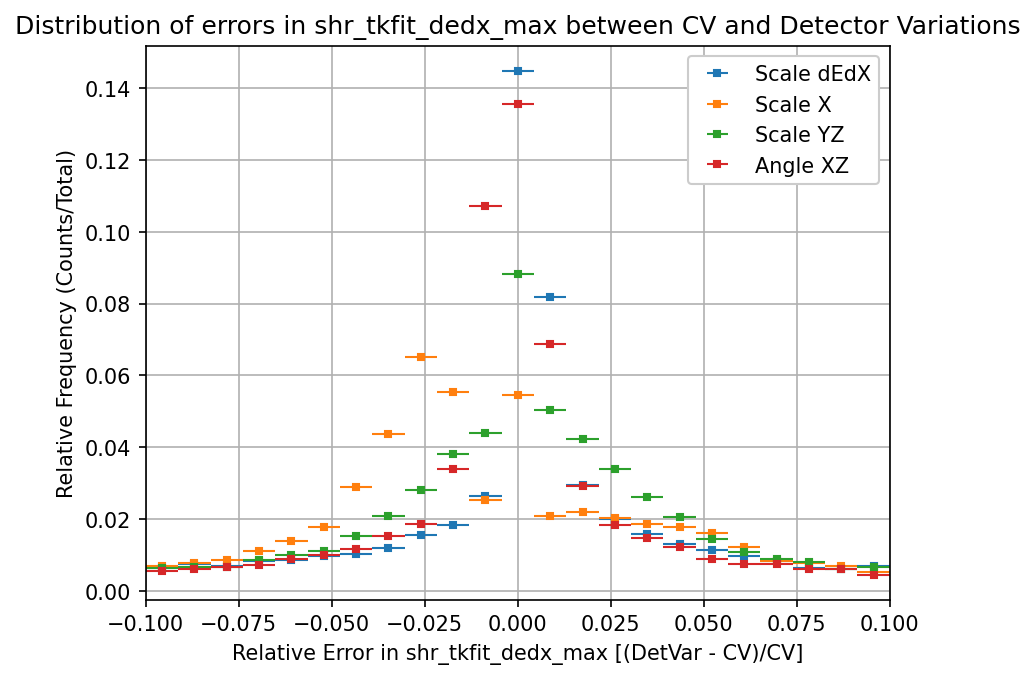

In [164]:
# Relative errors

rel_errors = get_rel_errors(var)

fig, ax = plt.subplots(dpi=150)
    
for i in range(len(df_list)-1):
    
    hist = get_rel_frequencies(rel_errors[i], err_bins)
    
    ax.errorbar(err_bin_centers,hist,xerr=err_bin_width/2,ls='none',marker='s',ms=2.5,lw=1,label=plot_labels[i])
#     err_ax.stairs(hist, err_bins, label=labels[i])
    
ax.grid(True)
ax.legend(framealpha=1)
ax.set_xlim(min(err_bins), max(err_bins))
ax.set_title(f'Distribution of errors in {var} between CV and Detector Variations')
ax.set_ylabel('Relative Frequency (Counts/Total)')
ax.set_xlabel(f'Relative Error in {var} [(DetVar - CV)/CV]');

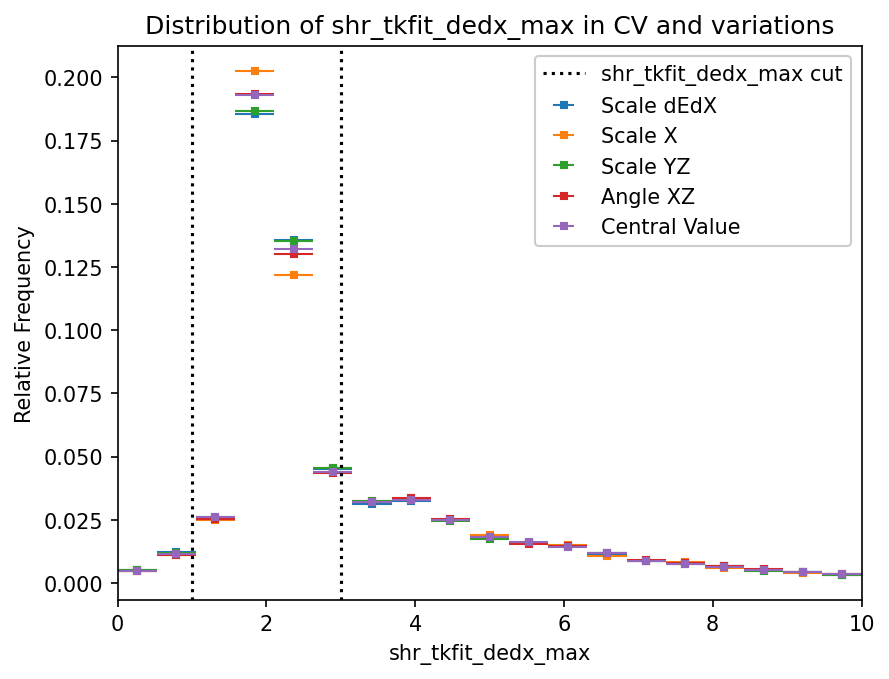

In [86]:
# Distribution of variable 1

fig, ax = plt.subplots(dpi=150)

for i in range(len(df_list)):
    
    hist = get_rel_frequencies(np.array(df_list[i][var]), bins)

    ax.errorbar(bin_centers,hist,xerr=bin_width/2,ls='none',marker='s',ms=2.5,lw=1, label=plot_labels[i]) #, edgecolor='black')

for i in range(len(limits)): 
    limit = limits[i]
    if i == 0 : # Only add one label for multiple limits
        ax.axvline(limit, ls=':',c='k', label=f'{var} cut')
    else:
        ax.axvline(limit, ls=':',c='k')
    
ax.legend(framealpha=1)
ax.set_xlim(min(bins), max(bins))
ax.set_title(f'Distribution of {var} in CV and variations')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel(f'{var}');

[ 27.74887385  25.0998008   31.28897569  34.94281042  87.54998572
 569.4945127  229.05676152 261.56261201 102.80077821  87.10338685
  49.4165964   61.80614856  86.09878048  76.30858405  22.4053565
  43.32435804  48.24935233  34.42382896  35.35533906]


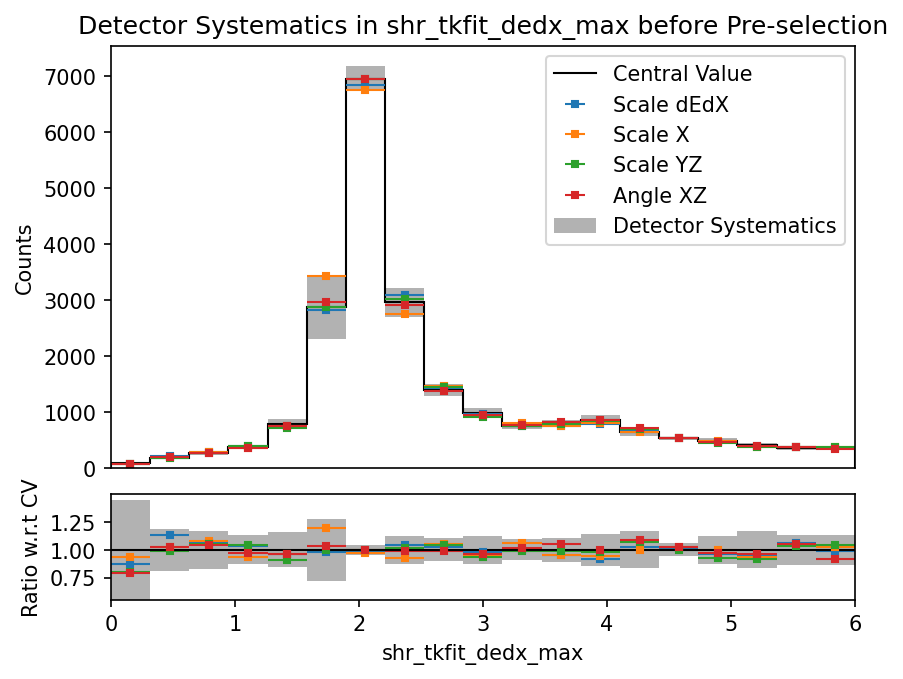

In [87]:
# Implement the uncertainties

hist_bins = np.linspace(0,6,20)
hist_bin_centers = (hist_bins[:-1]+hist_bins[1:])/2
hist_bin_width = hist_bins[1]-hist_bins[0]

fig = plt.figure(dpi=150)
gs = mpl.gridspec.GridSpec(2,1, height_ratios=[0.8, 0.2], wspace=0.2, hspace=0.1)

counts_ax = fig.add_subplot(gs[0,:])
ratio_ax = fig.add_subplot(gs[1,:])

# Plot the CV as a histogram
hist_cv = np.histogram(df_list[-1].loc[before_shared_index_all, [var]].to_numpy(), hist_bins)[0]
counts_ax.stairs(hist_cv, hist_bins, color='k', label='Central Value')

errors = np.zeros(len(hist_cv))

for i in range(len(df_list)-1):
    
    hist = np.histogram(df_list[i].loc[before_shared_index_all, [var]].to_numpy(), hist_bins)[0]
    
    errors += np.abs(hist-hist_cv)*np.abs(hist-hist_cv)
    
    counts_ax.errorbar(hist_bin_centers,hist,xerr=hist_bin_width/2,ls='none',marker='s',ms=2.5,lw=1, label=plot_labels[i])
    
    ratio = hist/hist_cv
    ratio_ax.errorbar(hist_bin_centers, ratio,xerr=hist_bin_width/2,
                   ls='none',marker='s',ms=2.5,lw=1)
    
errors = np.sqrt(errors)    
    
above_errors = hist_cv + errors
below_errors = hist_cv - errors
    
counts_ax.bar(hist_bin_centers, 2 * errors, bottom = below_errors, width = hist_bin_width, color='k', alpha=0.3, label='Detector Systematics')

ratio_ax.axhline(1, ls='-', color='k', linewidth=1) # Horizontal line for CV

ratio_errors = np.sqrt(2)*errors/hist_cv

ratio_ax.bar(hist_bin_centers, 2 * ratio_errors, bottom = 1-ratio_errors, width = hist_bin_width, color='k', alpha=0.3)

# Axis formatting
counts_ax.set_xlim(min(hist_bins),max(hist_bins))
counts_ax.set_ylabel('Counts')
counts_ax.set_xticks([])
counts_ax.legend(loc='best')
# if subtitle:
#     counts_ax.set_title(subtitle)

ratio_ax.set_xlim(min(hist_bins),max(hist_bins))
ratio_ax.set_ylabel('Ratio w.r.t CV')
ratio_ax.set_xlabel(var)

counts_ax.set_title(f'Detector Systematics in {var} before Pre-selection')

print(errors)

## Plot 2D Histograms

In [88]:
def plot_2d_hist_grid(var, bins, index, xlabel, ylabel, title, axis_titles=plot_labels, dpi=100, limits=None, plot_diagonal=True):
    
    # Allow passing a single index by duplicating it for each variation
    if len(index) == 1:
        index = [idx for _ in df_list[:-1]]
    
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=dpi)
    axs = axs.flatten()

    # Get the maximum bin value to set as the vmax
    vmax = 10
    for i in range(len(df_list)-1):
        vmax = max(vmax, np.max(np.histogram2d(df_list[-1].loc[index[i]][var], df_list[i].loc[index[i]][var], bins=bins)[0]))
        
    for i in range(len(df_list)-1):
        
        if len(index[i]) == 0:
            continue
        
        print(len(index[i]))

        _,_,_,im = axs[i].hist2d(df_list[-1].loc[index[i]][var], df_list[i].loc[index[i]][var], 
                                 bins=bins, norm=mpl.colors.LogNorm(vmax=vmax))

        axs[i].set_title(f'{axis_titles[i]}')

        for limit in limits: 
            axs[i].axvline(limit, ls='--',c='k', linewidth=0.8)
            axs[i].axhline(limit, ls='--',c='k', linewidth=0.8)

        # Add diagonal line
        if plot_diagonal:
            axs[i].plot([min(bins),max(bins)], [min(bins),max(bins)], linestyle='-', c='k', linewidth=0.9, alpha=0.8)

    fig.supylabel(xlabel)
    fig.supxlabel(ylabel)
    fig.suptitle(title)

    fig.colorbar(im, ax=axs.ravel().tolist());

29649
29583
29629
30272


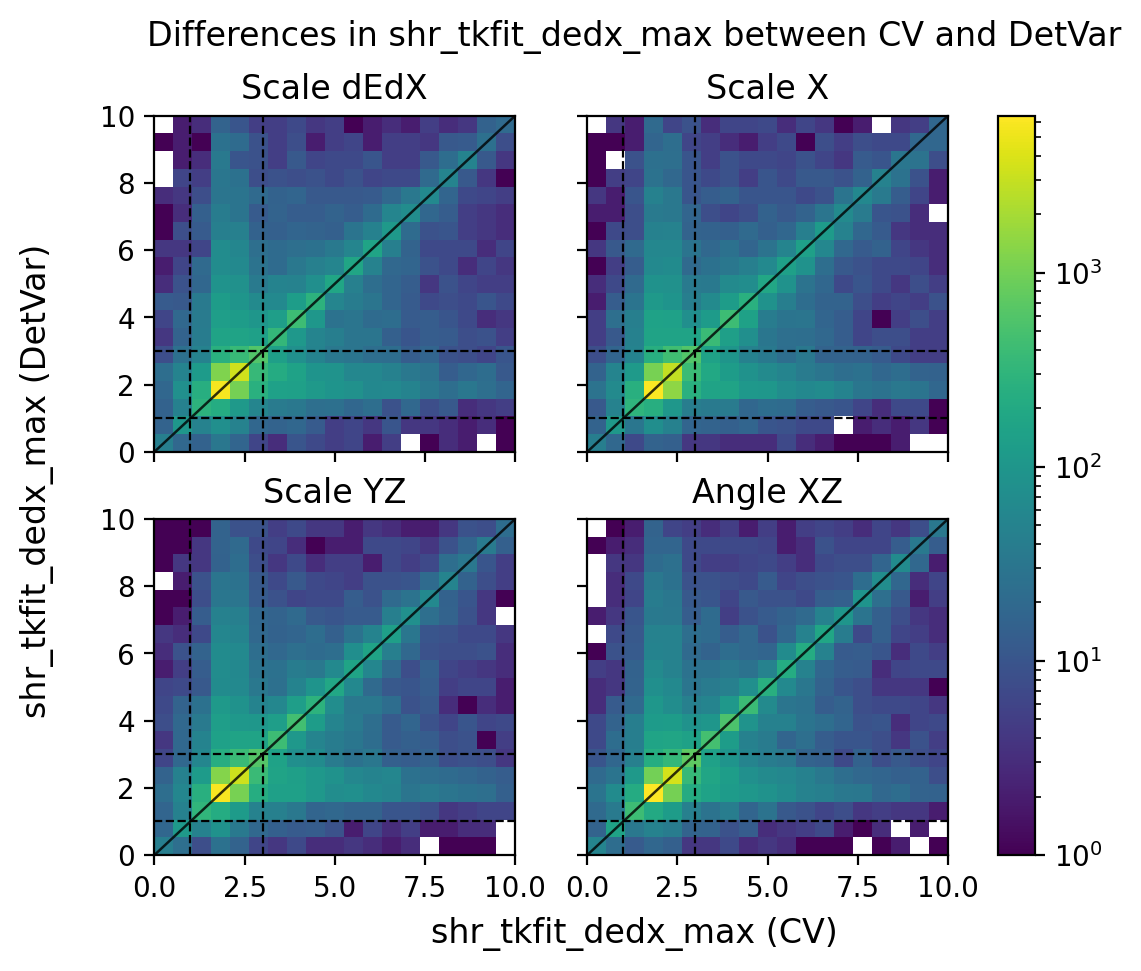

In [89]:
# All variable 1 (shared) events 
plot_2d_hist_grid(var, 
                  bins, 
                  shared_index, 
                  f'{var} (DetVar)', 
                  f'{var} (CV)', 
                  f'Differences in {var} between CV and DetVar', 
                  limits=limits, dpi=200)

6257
5905
5798
5346


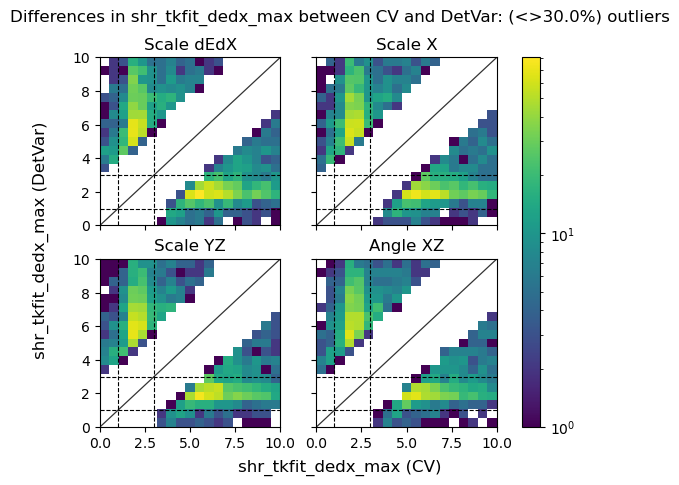

In [90]:
# Variable 1 outlier events
plot_2d_hist_grid(var, 
                  bins, 
                  sectioned_index, 
                  f'{var} (DetVar)', 
                  f'{var} (CV)', 
                  f'Differences in {var} between CV and DetVar: ({section_label}{section_value*100}%) outliers', 
                  limits=limits)

29649
29583
29629
30272


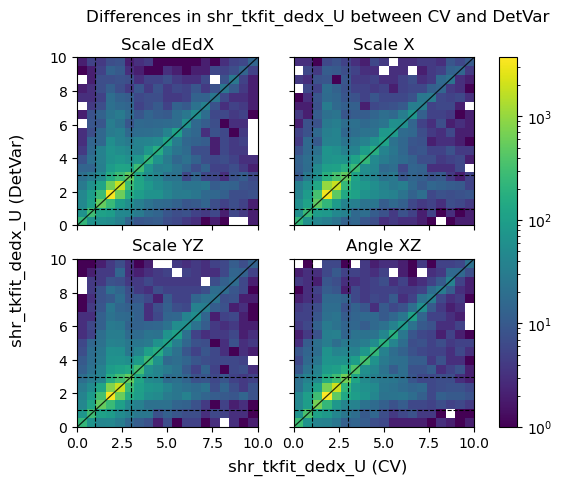

In [91]:
# All variable 2 (shared) events
plot_2d_hist_grid(var2, 
                  bins2, 
                  shared_index, 
                  f'{var2} (DetVar)', 
                  f'{var2} (CV)', 
                  f'Differences in {var2} between CV and DetVar', 
                  limits=limits2)

6257
5905
5798
5346


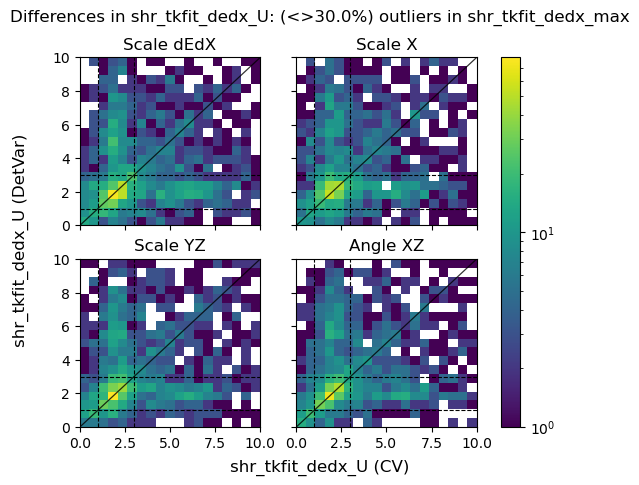

In [92]:
# Variable 1 outlier events plotted for variable 2
plot_2d_hist_grid(var2, 
                  bins2, 
                  sectioned_index, 
                  f'{var2} (DetVar)', 
                  f'{var2} (CV)', 
                  f'Differences in {var2}: ({section_label}{section_value*100}%) outliers in {var}', 
#                   f'Differences in {var2} between CV and DetVar events: ({section_label}{section_value*100}%) outliers in {var}', 
                  limits=limits2)

## Correlation Matrix For a Single Variable

In [93]:
matrix_bins = np.linspace(0,10,15)
matrix_bin_centers = (matrix_bins[:-1]+matrix_bins[1:])/2
matrix_bin_width = matrix_bins[1]-matrix_bins[0]

In [94]:
# function copied from Dr. Caratelli
def get_covariance(n_cv,n_var):
    cov = np.empty([len(n_cv), len(n_cv)])
    cov.fill(0)

    for i in range(len(n_cv)):
        for j in range(len(n_cv)):
            cov[i][j] += (n_var[i] - n_cv[i])*(n_var[j] - n_cv[j])

    frac_cov = np.empty([len(n_cv), len(n_cv)])
    corr = np.empty([len(n_cv), len(n_cv)])

    for i in range(len(n_cv)):
        for j in range(len(n_cv)):
            frac_cov[i][j] =  cov[i][j] / (n_cv[i] * n_cv[j])
            corr[i][j] = cov[i][j] / np.sqrt(cov[i][i] * cov[j][j])
    return cov,frac_cov,corr

In [95]:
num_bins = len(matrix_bins) - 1
num_variations = len(df_list)-1

cv_hist = np.histogram(df_list[-1].loc[shared_index_all, [var]].to_numpy(), matrix_bins)[0]

matrix = np.zeros((num_bins, num_bins))

for i in range(num_variations):

    hist = np.histogram(df_list[i].loc[shared_index_all, [var]].to_numpy(), matrix_bins)[0]
    
    cov, frac_cov, corr = get_covariance(cv_hist, hist)
    
    matrix += corr
    
#     diffs = (hist - cv_hist)/sum(hist + cv_hist)
#     diffs = (hist - cv_hist)/sum(cv_hist)
#     diffs = (hist - cv_hist)
# #     diffs = (hist - np.mean(hist))/hist
# #     diffs = (hist - cv_hist)/hist
    
#     print(diffs)
    
#     for j in range(num_bins):
        
#         for k in range(num_bins):
            
# #             print(f'{j},{k}: {diffs[j]*diffs[k]}')
        
# #             matrix[j][k] += diffs[j]*diffs[k]
#             sign_j = math.copysign(1, diffs[j])
#             sign_k = math.copysign(1, diffs[k])
# #             matrix[j][k] += sign_j*sign_k
        
# #             matrix[j][k] += diffs[j]*diffs[k]
# #             matrix[j][k] += diffs[j]*diffs[k]/num_bins/num_bins
# #             matrix[j][k] += diffs[j]*diffs[k]/cv_hist[j]/cv_hist[k]
#             matrix[j][k] += diffs[j]*diffs[k]/sum(cv_hist)/sum(cv_hist)
        
matrix = matrix / num_variations


/home/gkunkler/miniconda3/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  


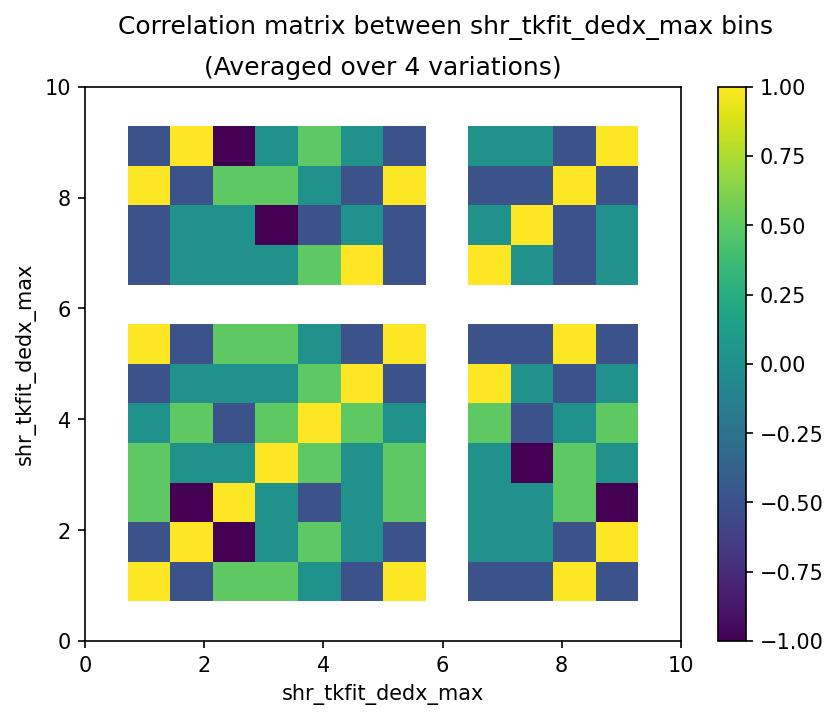

In [96]:
# Plot the correlation matrix

fig, ax = plt.subplots(dpi=150)

x = matrix_bin_centers
y = matrix_bin_centers
z = matrix

colormesh = ax.pcolormesh(x,y,z)
# colormesh = ax.pcolormesh(x,y,z, norm=mpl.colors.SymLogNorm(0.1))

ax.set_xlabel(f'{var}')
ax.set_ylabel(f'{var}')
fig.suptitle(f'Correlation matrix between {var} bins')
ax.set_title(f'(Averaged over {num_variations} variations)')

fig.colorbar(colormesh)

## Misclassification Matrices between Variations and Variables
Miscut/Misclassification is the term I am using to designate when one event behaves differently on a specific cut when compared between a DetVar and CV

In [97]:
# Function to determine whether a point is within/outside of the limits in both values -> bool
#  returns false if value1 and value2 either both pass or both fail a cut
#  return true otherwise

def is_misclassified(value1, value2, limits, tag='<'):
    if len(limits) == 1 and tag != '=':
        return ((value1 < limits[0]) ^ (value2 < limits[0]))
            
    elif len(limits) ==1 and tag == '=':
        return ((value1 == limits[0]) ^ (value2 == limits[0]))
        
    elif len(limits) == 2: # Assumes the cut is between the two
        return (((value1 < limits[0]) ^ (value1 < limits[1])) ^ ((value2 < limits[0]) ^ (value2 < limits[1])))
        
    elif len(limits) == 0:
        return np.zeros(len(cv), dtype=bool)
    
    else:
        raise ValueError("limits must have only 0, 1 or 2 values")

In [98]:
# Miscut Matrix and DataFrame

df_event_run_errors = pd.DataFrame(index=df_list[-1].index) # DataFrame to store miscut rates
df_event_run_errors['total'] = 0

miscut_matrix = np.zeros((len(var_bounds.keys()), len(df_list)-1))

for i, key in zip(range(len(var_bounds.keys())), var_bounds.keys()):
    limits = var_bounds[key]['limits']
    limit_tag = var_bounds[key]['limit_tag']
    
    df_event_run_errors[key] = 0
    
    for j in range(len(df_list)-1):
        
        df_event_run_errors[variation_titles[j]] = 0
        
        cv = np.array(df_list[-1].loc[shared_index[j]][key])
        detvar = np.array(df_list[j].loc[shared_index[j]][key])
        
        miscuts = is_misclassified(cv, detvar, limits, limit_tag).astype(int)
        
        miscut_matrix[i][j] += sum(miscuts)/len(miscuts)
        
        df_event_run_errors[key].loc[shared_index[j]] += miscuts
        df_event_run_errors['total'].loc[shared_index[j]] += 1
        df_event_run_errors[variation_titles[j]].loc[shared_index[j]] += miscuts
        
# combine across the different cut variables (to get a more resolved notion of how often events are misclassified)
df_event_run_errors['combined'] = df_event_run_errors.loc[:,var_bounds.keys()].sum(1)
df_event_run_errors['combined ratio'] = df_event_run_errors['combined'] / df_event_run_errors['total']
        
# print(df_event_run_errors.describe())
# print(miscut_matrix)

Text(0.5, 0.98, 'Misclassification Rate\n(Fraction of Events Cut Differently in CV and DetVar)')

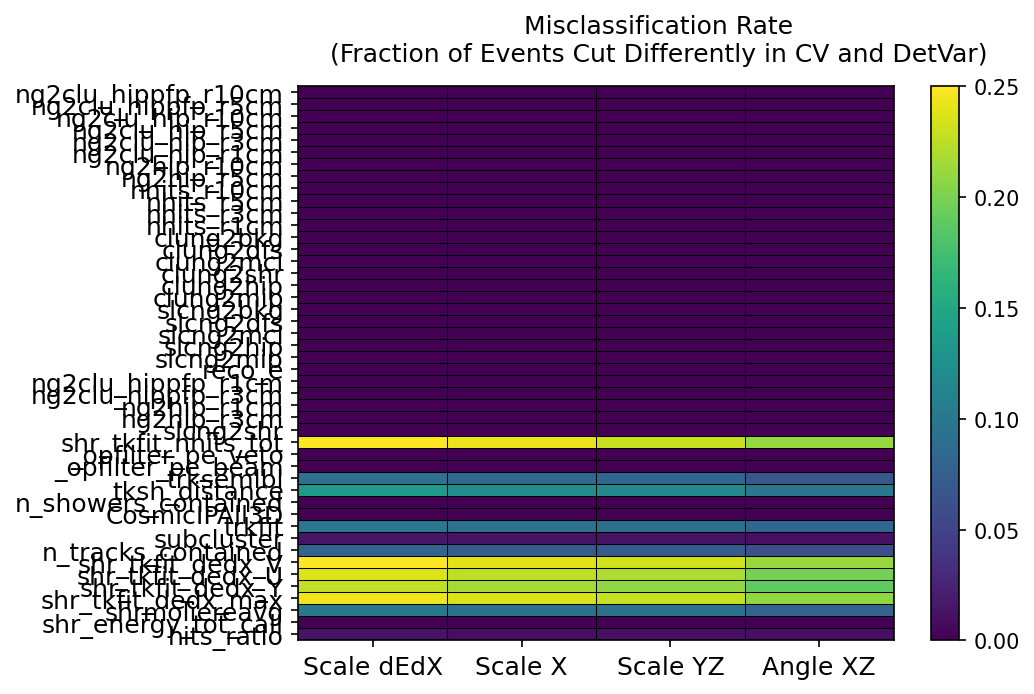

In [99]:
# Plot a 2d color mesh for the miscut matrix

fig, ax = plt.subplots(dpi=150)

x = np.arange(0,np.size(miscut_matrix, 1),1)
y = np.arange(0,np.size(miscut_matrix, 0),1)
z = miscut_matrix

colormesh = ax.pcolormesh(x,y,z)

ax.set_xticks(x)
ax.set_xticklabels(plot_labels[:-1], fontsize=12) #,rotation=45, ha='right')
ax.set_yticks(y)
ax.set_yticklabels(var_bounds.keys(), fontsize=12)

# Add black lines
for i in x[1:]:
    ax.axvline(x[i]-0.5, color='k', linewidth=0.5)
for i in y[1:]:
    ax.axhline(y[i]-0.5, color='k', linewidth=0.5)

fig.colorbar(colormesh)
fig.suptitle('Misclassification Rate\n(Fraction of Events Cut Differently in CV and DetVar)')

In [ ]:
# Function to plot the correlation matrix based on desired ordering and filtering
#  index should be a single index (set of events) that are included
def calculate_correlation_matrix(index, variable_list, variation_list, invert_order=False):

    num_variables = len(variable_list)
    num_variations = len(variation_list)

    correlation_matrix = np.zeros((num_variables * num_variations, num_variables * num_variations))

    cv = df_list[-1].loc[index]

    labels = []
    
    # We need every pair of (variable + variation combination)
    #  var = variable (i, k)
    #  detvar = variation (j, l)
    
    if not invert_order:
        
        # Normal Ordering
        for i, var_i in enumerate(variable_list):
            limits_i = var_bounds[var_i]['limits']
            limit_tag_i = var_bounds[var_i]['limit_tag']
            cv_array_i = np.array(cv[var_i])

            for j, detvar_j in enumerate(variation_list):
                detvar_array_j = np.array(df_list[j].loc[index][var_i])

                index_ij = i*num_variations + j
                labels.append(f'{i}, {j}')

                for k, var_k in enumerate(variable_list):
                    limits_k = var_bounds[var_k]['limits']
                    limit_tag_k = var_bounds[var_k]['limit_tag']
                    cv_array_k = np.array(cv[var_k])

                    for l, detvar_l in enumerate(variation_list):
                        detvar_array_l = np.array(df_list[l].loc[index][var_k])

                        index_kl = k*num_variations + l

                        # Now that we have collected all of the required data, we perform the misclassification calculation and map
                        # the result to -1 (CV and DetVar have the same value) or +1 (CV and DetVar have different values)
                        # Then we multiply the results from the two DetVar together and the mean of this array is the correlation

                        misclassified_ij = is_misclassified(cv_array_i, detvar_array_j, limits_i, limit_tag_i).astype(int) * 2 - 1
                        misclassified_kl = is_misclassified(cv_array_k, detvar_array_l, limits_k, limit_tag_k).astype(int) * 2 - 1

                        correlation_ijkl = np.mean(misclassified_ij * misclassified_kl)

                        correlation_matrix[index_ij][index_kl] = correlation_ijkl
        
    else:
        
        # Inverted Ordering
        
        for j, detvar_j in enumerate(variation_list):
            for i, var_i in enumerate(variable_list):
                detvar_array_j = np.array(df_list[j].loc[index][var_i])    

                limits_i = var_bounds[var_i]['limits']
                limit_tag_i = var_bounds[var_i]['limit_tag']
                cv_array_i = np.array(cv[var_i])

                index_ij = j*num_variables + i
                labels.append(f'{i}, {j}')

                for l, detvar_l in enumerate(variation_list):
                    for k, var_k in enumerate(variable_list):
                        detvar_array_l = np.array(df_list[l].loc[index][var_k])

                        limits_k = var_bounds[var_k]['limits']
                        limit_tag_k = var_bounds[var_k]['limit_tag']
                        cv_array_k = np.array(cv[var_k])

                        index_kl = l*num_variables + k

                        misclassified_ij = is_misclassified(cv_array_i, detvar_array_j, limits_i, limit_tag_i).astype(int) * 2 - 1
                        misclassified_kl = is_misclassified(cv_array_k, detvar_array_l, limits_k, limit_tag_k).astype(int) * 2 - 1

                        correlation_ijkl = np.mean(misclassified_ij * misclassified_kl)

                        correlation_matrix[index_ij][index_kl] = correlation_ijkl
                        
    return correlation_matrix, labels

In [ ]:
# Generate the correlation matrix

# variable_list = list(var_bounds.keys())
variable_list = ['shrmoliereavg', 'n_tracks_contained', 'shr_tkfit_dedx_max', 'trkfit', 'tksh_distance', 'trksemlbl', 'shr_tkfit_nhits_tot']
# variable_list.extend(nugraph_variables)

variation_list = plot_labels[:-1]
# variation_list = plot_labels[1:2]

invert_order = False

correlation_matrix, labels = calculate_correlation_matrix(pre_shared_index_all, variable_list, variation_list, invert_order=invert_order)


In [ ]:
# Plot a 2d color mesh for the correlation matrix

fig = plt.figure(dpi=250)
gs = mpl.gridspec.GridSpec(2,4, width_ratios=[1, 0.03, 0.05, 0.25], height_ratios=[0.8, 0.2], wspace=0.2, hspace=0.2)

# Create the correlation matrix
ax_matrix = fig.add_subplot(gs[:,0])
ax_matrix.set_aspect('equal')

x = np.arange(0,np.size(correlation_matrix, 1),1)
y = np.arange(0,np.size(correlation_matrix, 0),1)
z = correlation_matrix

colormesh = ax_matrix.pcolormesh(x,y,z)

# Set the ticks
ax_matrix.set_xticks(x)
ax_matrix.set_xticklabels(labels, fontsize=4,rotation=90)
ax_matrix.set_yticks(y)
ax_matrix.set_yticklabels(labels, fontsize=4)

# Add black lines
lines = np.arange(0,np.size(correlation_matrix, 1), len(variable_list if invert_order else variation_list)) - 0.5 # Change which list to match the 2nd loop

for line in lines:
    ax_matrix.axvline(line, color='k', linewidth=0.05, alpha=1)
    ax_matrix.axhline(line, color='k', linewidth=0.05, alpha=1)
    
ax_matrix.set_xlabel('(Variable i, Variation j)')
ax_matrix.set_ylabel('(Variable i, Variation j)')
    
# Create the color bar
ax_cbar = fig.add_subplot(gs[:, 1])  

fig.colorbar(colormesh, cax=ax_cbar)

# Create the variable table
ax_table_var = fig.add_subplot(gs[0, 3])
ax_table_var.axis('off')
df = pd.DataFrame({'i':range(len(variable_list)), 'Variable':variable_list})
table = ax_table_var.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

for row in range(len(df) + 1): # (+1 to include header row)
    table[(row, 0)].set_width(0.2)
    table[(row, 1)].set_width(1.0)

# Create the variation table
ax_table_detvar = fig.add_subplot(gs[1, 3])
ax_table_detvar.axis('off')
df = pd.DataFrame({'j':range(len(variation_list)), 'Variation':variation_list})
table = ax_table_detvar.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

for row in range(len(df) + 1):  # (+1 to include header row)
    table[(row, 0)].set_width(0.2)
    table[(row, 1)].set_width(1.0) 

fig.suptitle('Correlation Matrix between Detector Variations\nPerforming Cuts the Same Way as CV (for the Same Event)');

In [ ]:
# Create a correlation matrix between the chosen variables (removes special values from all of them)

variable_list = ['shrmoliereavg', 'n_tracks_contained', 'shr_tkfit_dedx_max', 'trkfit', 'tksh_distance', 'trksemlbl', 'shr_tkfit_nhits_tot']
variable_list.extend(nugraph_variables[:])

variation_index = 0

num_variables = len(variable_list)

covariance_matrix = np.zeros((num_variables, num_variables))
correlation_matrix_2 = np.zeros((num_variables, num_variables))

for i, var_i in enumerate(variable_list):
    for j, var_j in enumerate(variable_list):
        
        index, index_all = filter_index(shared_index[:], shared_index_all, [var_i, var_j], variation_index=variation_index, exponent_threshold=7)
        
        detvar_i = np.array(df_list[variation_index].loc[index_all][var_i]) 
        detvar_j = np.array(df_list[variation_index].loc[index_all][var_j])
        
        # Use central value as the expected value
        cv_i = np.array(df_list[-1].loc[index_all, var_i]) 
        cv_j = np.array(df_list[-1].loc[index_all,var_j]) 
        
        mean = np.mean((detvar_i - cv_i)*(detvar_j - cv_j))
        
        covariance_matrix[i][j] = mean
        
for i in range(len(variable_list)):
    for j in range(len(variable_list)):
        correlation_matrix_2[i][j] = covariance_matrix[i][j] / np.sqrt(covariance_matrix[i][i] * covariance_matrix[j][j])
        
print(correlation_matrix_2)

print(np.all(correlation_matrix_2.transpose() == correlation_matrix_2))


In [ ]:
# Plot a 2d color mesh for the second correlation matrix

fig = plt.figure(dpi=250)
gs = mpl.gridspec.GridSpec(1,4, width_ratios=[1, 0.03, 0.05, 0.25], wspace=0.2, hspace=0.2)

# Create the correlation matrix
ax_matrix = fig.add_subplot(gs[:,0])
ax_matrix.set_aspect('equal')

x = np.arange(0,np.size(correlation_matrix_2, 1),1)
y = np.arange(0,np.size(correlation_matrix_2, 0),1)
z = correlation_matrix_2

colormesh = ax_matrix.pcolormesh(x,y,z)

# Set the ticks
ax_matrix.set_xticks(x)
ax_matrix.set_xticklabels(range(len(variable_list)), fontsize=4)
ax_matrix.set_yticks(y)
ax_matrix.set_yticklabels(range(len(variable_list)), fontsize=4)

ax_matrix.set_xlabel('Variable Index')
ax_matrix.set_ylabel('Variable Index')
    
# Create the color bar
ax_cbar = fig.add_subplot(gs[:, 1])  

fig.colorbar(colormesh, cax=ax_cbar)

# Create the variable table
ax_table_var = fig.add_subplot(gs[:, 3])
ax_table_var.axis('off')
df = pd.DataFrame({'i':range(len(variable_list)), 'Variable':variable_list})
table = ax_table_var.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

for row in range(len(df) + 1): # (+1 to include header row)
    table[(row, 0)].set_width(0.2)
    table[(row, 1)].set_width(1.0)

ax_matrix.set_title(f'Correlation Matrix ({plot_labels[variation_index]})');

## Picking out events to look at EventDisplay

In [197]:
selection_var = 'shr_tkfit_dedx_max'
other_vars = ['shr_tkfit_dedx_Y', 'shr_tkfit_dedx_U', 'shr_tkfit_dedx_V']
selection_variation_index = 1

# Configuration of selection (set to None if unused)
cv_target = 2 
cv_extreme = None
detvar_target = None
detvar_extreme = 6
buffer = 0.25 # Buffer region around the target (must exist if either target is active)

selection_title = f"Selection on {selection_var}: "
if cv_target:
    selection_title += f'\n = {cv_target} ± {buffer} in CV'
    
if cv_extreme:
    selection_title += f'\n > {cv_extreme} in CV'
    
if detvar_target:
    selection_title += f'\n = {detvar_target} ± {buffer} in {variation_titles[selection_variation_index]}'
    
if detvar_extreme:
    selection_title += f'\n > {detvar_extreme} in {variation_titles[selection_variation_index]}'
    
print(selection_title)

df_detvar = df_list[selection_variation_index].loc[pre_shared_index_all] # Start with the list of all of the events shared with all variations
df_cv = df_list[-1].loc[pre_shared_index_all]

# Filter the dataframes to just the events within the target region
if cv_target:
    df_cv = df_cv[(df_cv[selection_var] > cv_target - buffer) & (df_cv[selection_var] < cv_target + buffer)]
if detvar_target:
    df_detvar = df_detvar[(df_detvar[selection_var] > detvar_target - buffer) & (df_detvar[selection_var] < detvar_target + buffer)]

# Filter the dataframes to just the events above the extremes
if cv_extreme:
    df_cv = df_cv[df_cv[selection_var] > cv_extreme]
if detvar_extreme:
    df_detvar = df_detvar[df_detvar[selection_var] > detvar_extreme]

# filter_index = ((df_detvar[selection_var] - df_cv[selection_var] > difference) | (df_detvar[selection_var] - df_cv[selection_var] < -difference))

target_index = df_detvar.index.intersection(df_cv.index)
# target_index = target_index.intersection(temp3)

print(df_cv.loc[target_index, ['evt', 'run', 'sub', selection_var]])

print(f'Selecting randomly from {len(target_index)} candidates')

random_index = random.randint(0,len(target_index)-1)

df_variations = pd.DataFrame(columns=list(df_cv.columns) + ['variation'])
for i in range(len(df_list)):
    
    df = df_list[i].loc[target_index]
    
    df = df.iloc[[random_index]]
    
    df['variation'] = variation_titles[i]
    
#     df_variations = df
    df_variations = df_variations.append(df, ignore_index=True)
    
df_variations = df_variations.set_index('variation')

print(df_variations.loc[:,['evt', 'run', 'sub', selection_var]])

Selection on shr_tkfit_dedx_max: 
 = 2 ± 0.25 in CV
 > 6 in wiremod_ScaleX
               evt   run   sub  shr_tkfit_dedx_max
ident_id                                          
-1582306463   8129  7006   162            2.088748
-1575824138  20454  7010   409            2.062286
-1581175898  28694  7003   573            2.197745
 2057263883   1179  6352    23            1.789645
-2122371771   2821  6467    56            2.202602
...            ...   ...   ...                 ...
-1571954906  49686  7008   993            1.967919
-1567402199  62393  7010  1247            2.193628
-1575864332  20260  7010   405            1.969100
 2005082975    271  6300     5            2.027354
-1575206233  58359  7003  1167            2.116697

[255 rows x 4 columns]
Selecting randomly from 255 candidates
                    evt   run  sub  shr_tkfit_dedx_max
variation                                             
wiremod_ScaledEdX  8319  5386  166            9.303595
wiremod_ScaleX     8319  5386  166

In [203]:
# Get the values for a certain event, run, sub combination

evt = [22297]
run = [7008]
subrun = [445]

df_variations = pd.DataFrame(columns=list(df_cv.columns) + ['variation'])
for i in range(len(df_list)):
    
    df = df_list[i]
    
    if evt:
        df = df[df['evt'].isin(evt)]
    if run:
        df = df[df['run'].isin(run)]
    if subrun:
        df = df[df['sub'].isin(subrun)]
        
    for j in df.index:
        
        if j in cut_shared_index_all:
            print(f'shared: {j}')
    
    df['variation'] = variation_titles[i]
    df_variations = df_variations.append(df, ignore_index=True)
    
df_variations = df_variations.set_index('variation')

show_vars = ['evt', 'run', 'sub', selection_var]
show_vars.extend(other_vars)
# print()
print(df_variations.loc[:,show_vars])

                     evt   run  sub  shr_tkfit_dedx_max  shr_tkfit_dedx_Y  shr_tkfit_dedx_U  shr_tkfit_dedx_V
variation                                                                                                    
wiremod_ScaledEdX  22297  7008  445            6.111948      2.208683e+00          4.764207          6.111948
wiremod_ScaleX     22297  7008  445            1.930679     -3.402823e+38          3.691278          1.930679
wiremod_ScaleYZ    22297  7008  445            6.564722      7.981410e-01          3.902200          6.564722
WireModAngleXZ     22297  7008  445            6.599526     -3.402823e+38          1.161157          6.599526
CV                 22297  7008  445            6.860847      3.915172e+00          3.878021          6.860847


In [208]:

print(f'Variation: num_max_align/total_after_preselection')
for i in range(len(df_list)):

    df = df_list[i].loc[pre_shared_index_all]
    
    df['actual_max'] = df[other_vars].max(axis=1)
    
    df_good = df[df['actual_max'] == df[selection_var]]
    
    print(f'{plot_labels[i]}: {len(df_good)}/{len(df)} = {np.round(len(df_good)/len(df), 3)}')


Variation: num_max_align/total_after_preselection
Scale dEdX: 10385/19861 = 0.523
Scale X: 9745/19861 = 0.491
Scale YZ: 10353/19861 = 0.521
Angle XZ: 10296/19861 = 0.518
Central Value: 10330/19861 = 0.52


## Preselection and Cut Efficiency Plots

In [102]:
# Define binning
# cut_bins = np.linspace(0,2.5,20)
cut_bins = np.linspace(0,2.5,10)
cut_bin_centers = (cut_bins[:-1]+cut_bins[1:])/2
cut_bin_width = cut_bins[1]-cut_bins[0]

In [103]:
def plot_cut_efficiency(before_index, after_index, bins, ylabel, title, subtitle = None, dpi=150, legend_loc='best', ratio_bounds = None):
    
    bin_centers = (bins[:-1]+bins[1:])/2
    bin_width = bins[1]-bins[0]
    
    # Allow passing a single index by duplicating it for each variation
    if len(before_index) == 1:
        before_index = [before_index for _ in df_list]
    if len(after_index) == 1:
        after_index = [after_index for _ in df_list]
    
    fig = plt.figure(dpi=dpi)
    gs = mpl.gridspec.GridSpec(2,1, height_ratios=[0.8, 0.2], wspace=0.2, hspace=0.1)

    cut_ax = fig.add_subplot(gs[0,:])
    ratio_ax = fig.add_subplot(gs[1,:])
    
    # Plot CV first
    
    before_hist = np.histogram(df_list[-1].loc[before_index[-1], ['elec_e']].to_numpy(), bins)[0]
    after_hist = np.histogram(df_list[-1].loc[after_index[-1], ['elec_e']].to_numpy(), bins)[0]

    cv_cut_efficiency = after_hist/before_hist

    cv_proportion_error = np.sqrt(cv_cut_efficiency*(1-cv_cut_efficiency)/before_hist) # Standard error for a proportion

    cut_ax.stairs(cv_cut_efficiency, bins, 
                               ls='-',color='k',lw=1,
                               label=f'{plot_labels[-1]}')

    # Store cut efficiencies and standard errors to get the ratio in a second for-loop
    cut_efficiencies = []
    proportion_errors = []
    errors = np.zeros(len(cv_cut_efficiency))

    # Create the upper plot with the cut efficiencies
    for i in range(len(df_list)-1):

        before_hist = np.histogram(df_list[i].loc[before_index[i], ['elec_e']].to_numpy(), bins)[0]
        after_hist = np.histogram(df_list[i].loc[after_index[i], ['elec_e']].to_numpy(), bins)[0]

        cut_efficiency = after_hist/before_hist
        cut_efficiencies.append(cut_efficiency)

        proportion_error = np.sqrt(cut_efficiency*(1-cut_efficiency)/before_hist) # Standard error for a proportion
        proportion_errors.append(proportion_error)

        cut_ax.errorbar(bin_centers, cut_efficiency,xerr=bin_width/2, yerr=proportion_error, 
                                   ls='none',marker='s',ms=2.5,lw=1,
                                   label=f'{plot_labels[i]}')
        
        errors += np.abs(cut_efficiency - cv_cut_efficiency)*np.abs(cut_efficiency - cv_cut_efficiency)
        
    errors = np.sqrt(errors)
    
    cut_ax.bar(bin_centers, 2 * errors, bottom = cv_cut_efficiency - errors, width = bin_width, color='k', alpha=0.3, label='Detector Systematics')

    # Create the lower plot for ratios with CV
    for i in range(len(df_list)-1):
        
        ratio = cut_efficiencies[i]/cv_cut_efficiency
        division_error = np.sqrt(proportion_errors[i]*proportion_errors[i]/cv_cut_efficiency + 
                                 cv_proportion_error*cv_proportion_error/cut_efficiencies[i]) # Propagated uncertainty for division
        
        ratio_ax.errorbar(bin_centers, ratio,xerr = bin_width/2, yerr = division_error,
                       ls='none',marker='s',ms=2.5,lw=1)

    ratio_ax.axhline(1, ls='-', color='k', linewidth=1) # Horizontal line for CV
    
    ratio_errors = errors/cv_cut_efficiency
    
    ratio_ax.bar(bin_centers, 2 * ratio_errors, bottom = 1 - ratio_errors, width = bin_width, color='k', alpha=0.3, label='Detector Systematics')
    
    # Axis formatting
    cut_ax.set_xlim(min(bins),max(bins))
    cut_ax.set_ylim(0,1)
    cut_ax.set_ylabel(ylabel)
    cut_ax.set_xticks([])
    cut_ax.legend(loc=legend_loc)
    if subtitle:
        cut_ax.set_title(subtitle)

    ratio_ax.set_xlim(min(bins),max(bins))
    if ratio_bounds:
        ratio_ax.set_ylim(ratio_bounds[0], ratio_bounds[1])
    
    ratio_ax.set_ylabel('Ratio w.r.t CV')
    ratio_ax.set_xlabel('Electron Energy [GeV]')
    
    fig.suptitle(title)

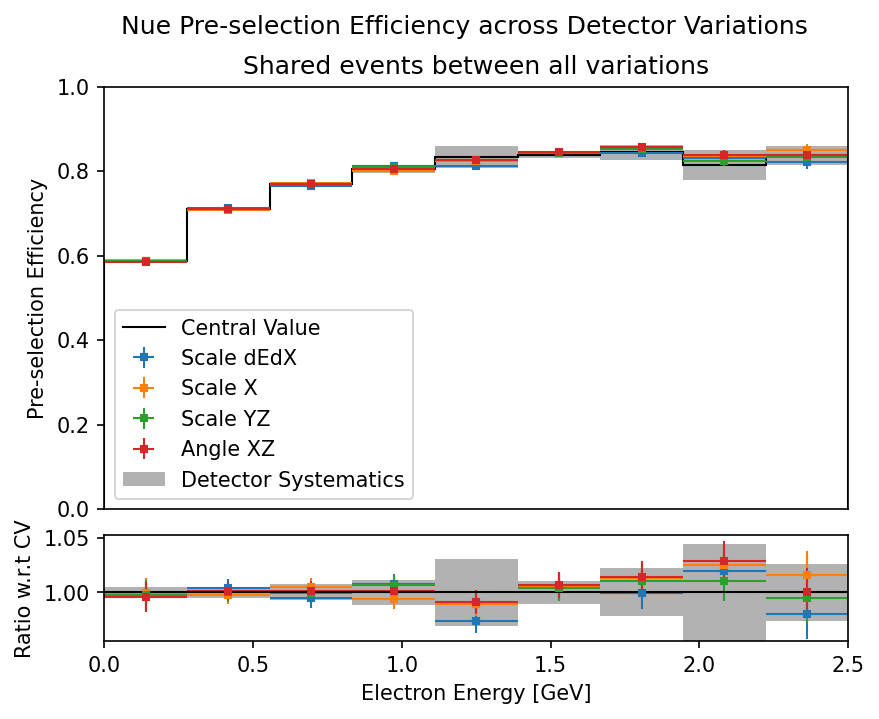

In [104]:
# Preselection
plot_cut_efficiency(before_intersected_index,
                    pre_intersected_index,
                    cut_bins, 
                    'Pre-selection Efficiency',
                    f'Nue Pre-selection Efficiency across Detector Variations',
                   subtitle=f'Shared events between all variations')

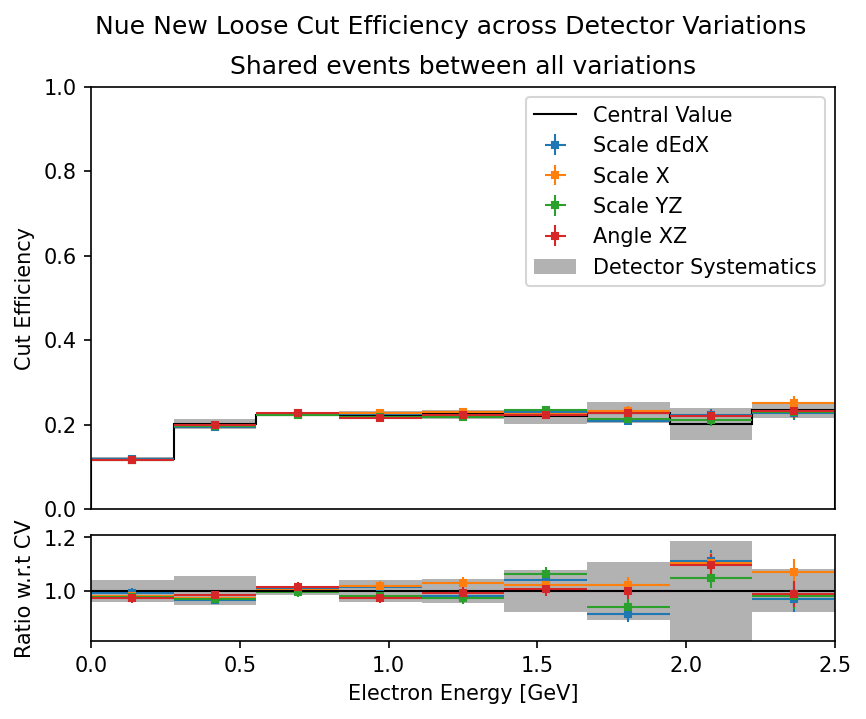

In [105]:
# New Loose Cuts
plot_cut_efficiency(before_intersected_index,
                    cut_intersected_index,
                    cut_bins, 
                    'Cut Efficiency',
                    f'Nue New Loose Cut Efficiency across Detector Variations',
                   subtitle=f'Shared events between all variations')

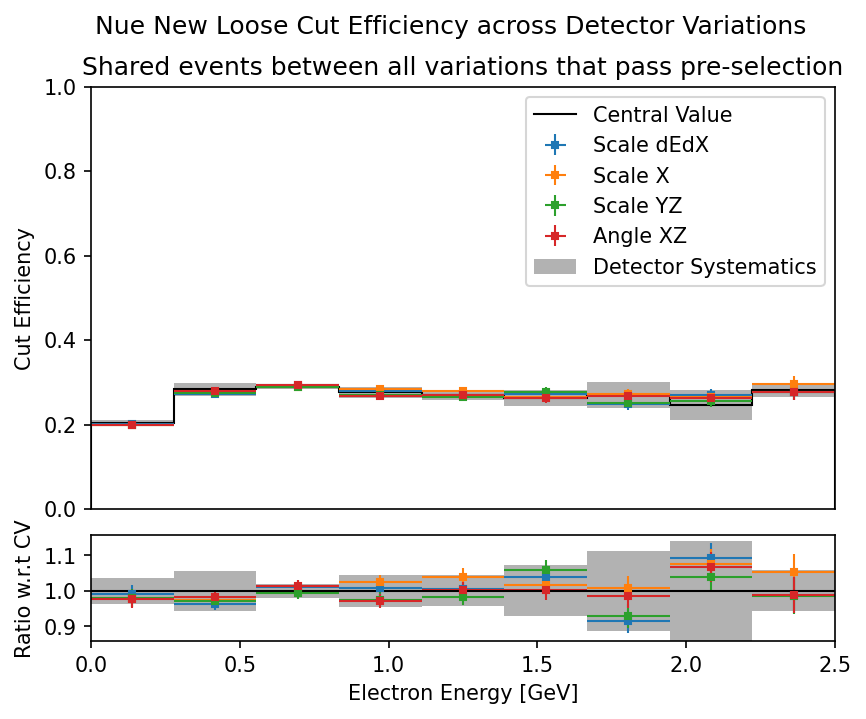

In [106]:
# New Loose Cuts (only events that pass pre-selection)
plot_cut_efficiency(pre_intersected_index,
                    cut_intersected_index,
                    cut_bins, 
                    'Cut Efficiency',
                    f'Nue New Loose Cut Efficiency across Detector Variations',
                   subtitle=f'Shared events between all variations that pass pre-selection')

## Plotting single variable across one variation

In [107]:
# selection_vars = ['slcng2mip', 'slcng2hip', 'slcng2shr']
# selection_var_total = 'slcng2_total'
# selection_variation_index = 1
# selection_name = 'Proportion of Hits in Semantic Label'
# selection_shorthand = 'slcng2'
# selection_bin_max = 1
# selection_num_bins = 20

# selection_vars = ['clung2mip', 'clung2hip', 'clung2shr']
# selection_var_total = 'clung2_total'
# selection_variation_index = 1
# selection_name = 'Proportion of Clustered Hits in Semantic Label'
# selection_shorthand = 'clung2'
# selection_bin_max = 1
# selection_num_bins = 20

# selection_vars = ['nhits_r1cm', 'nhits_r3cm', 'nhits_r5cm', 'nhits_r10cm']
# selection_var_total = None
# selection_variation_index = 1
# selection_name = 'Number of Hits within Radius'
# selection_shorthand = 'nhit_rXcm'
# selection_bin_max = 400
# selection_num_bins = 20


# selection_vars = ['ng2hip_r1cm', 'ng2hip_r3cm', 'ng2hip_r5cm', 'ng2hip_r10cm']
# selection_var_total = None
# selection_variation_index = 1
# selection_name = 'Number of HIP Hits within Radius'
# selection_shorthand = 'ng2hip_rXcm'
# selection_bin_max = 200
# selection_num_bins = 20

selection_vars = ['ng2hip_r1cm', 'ng2hip_r3cm', 'ng2hip_r5cm', 'ng2hip_r10cm']
selection_var_total = 'slcng2hip'
selection_variation_index = 1
selection_name = 'Proportion of HIP Hits within Radius'
selection_shorthand = 'ng2hip_rXcm/slcng2hip'
selection_bin_max = 1
selection_num_bins = 20

# selection_vars = ['ng2clu_hip_r1cm', 'ng2clu_hip_r3cm', 'ng2clu_hip_r5cm', 'ng2clu_hip_r10cm']
# selection_var_total = None
# selection_variation_index = 1
# selection_name = 'Number of HIP Hits within Radius (Clustered in PFPs)'
# selection_shorthand = 'ng2clu_hip_rXcm'
# selection_bin_max = 200
# selection_num_bins = 20

# selection_vars = ['ng2clu_hippfp_r1cm', 'ng2clu_hippfp_r3cm', 'ng2clu_hippfp_r5cm', 'ng2clu_hippfp_r10cm']
# selection_var_total = None
# selection_variation_index = 1
# selection_name = 'Number of HIP Hits within Radius (Clustered in HIP-labeled PFPs)'
# selection_shorthand = 'ng2clu_hippfp_rXcm'
# selection_bin_max = 200
# selection_num_bins = 20

/home/gkunkler/miniconda3/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/gkunkler/miniconda3/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


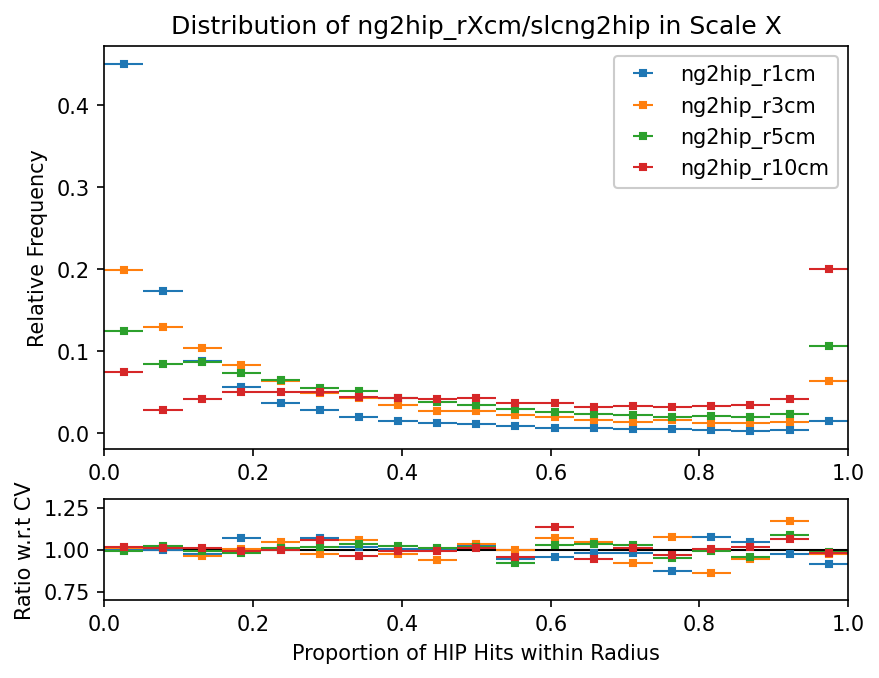

In [108]:
multi_bins = np.linspace(0,selection_bin_max,selection_num_bins)
multi_bin_centers = (multi_bins[:-1]+multi_bins[1:])/2
multi_bin_width = multi_bins[1]-multi_bins[0]
multi_limits = []

_, index_all = filter_index(shared_index, shared_index_all, selection_vars)

if selection_var_total:

    totals = np.array(df_list[selection_variation_index].loc[index_all][selection_var_total])
    cv_totals = np.array(df_list[-1].loc[index_all][selection_var_total])

fig = plt.figure(dpi=150)

gs = mpl.gridspec.GridSpec(2,1, height_ratios=[0.8, 0.2], wspace=0.2, hspace=0.2)

lines_ax = fig.add_subplot(gs[0,:])
ratio_ax = fig.add_subplot(gs[1,:])

ratio_ax.axhline(1, ls='-', c='k', linewidth=1)    
    
for var_temp in selection_vars:
    
    values = np.array(df_list[selection_variation_index].loc[index_all][var_temp])
    cv_values = np.array(df_list[-1].loc[index_all][var_temp])
    
    if selection_var_total:
    
        rel_freq = get_rel_frequencies(values/totals, multi_bins)
        cv_rel_freq = get_rel_frequencies(cv_values/cv_totals, multi_bins)
        
    else:
        
        rel_freq = get_rel_frequencies(values, multi_bins)
        cv_rel_freq = get_rel_frequencies(cv_values, multi_bins)
    
    lines_ax.errorbar(multi_bin_centers,rel_freq,xerr=multi_bin_width/2,ls='none',marker='s',ms=2.5,lw=1, label=var_temp) # Without error bars
    
    ratio_ax.errorbar(multi_bin_centers,rel_freq/cv_rel_freq,xerr=multi_bin_width/2, ls='none',marker='s',ms=2.5,lw=1)
    
for limit in multi_limits: 
    lines_ax.axvline(limit, ls=':',c='k') #, label=f'{var} limit')
    

ratio_ax.set_ylabel('Ratio w.r.t CV')
ratio_ax.set_xlim(min(multi_bins), max(multi_bins))
ratio_ax.set_ylim(0.7, 1.3)

    
lines_ax.legend(framealpha=1)
lines_ax.set_xlim(min(multi_bins), max(multi_bins))
lines_ax.set_title(f'Distribution of {selection_shorthand} in {plot_labels[selection_variation_index]}')
lines_ax.set_ylabel('Relative Frequency')
ratio_ax.set_xlabel(selection_name);

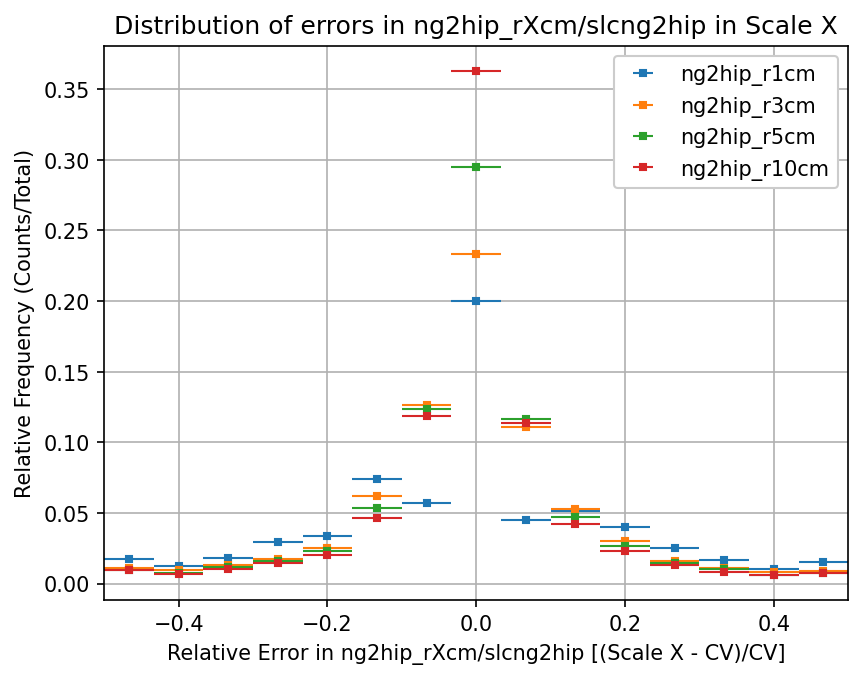

In [109]:
multi_err_bins = np.linspace(-0.5,0.5,16)
multi_err_bin_centers = (multi_err_bins[:-1]+multi_err_bins[1:])/2
multi_err_bin_width = multi_err_bins[1]-multi_err_bins[0]

err_fig, err_ax = plt.subplots(dpi=150)
    
for var_temp in selection_vars:
    
    detvar = df_list[selection_variation_index].loc[shared_index[selection_variation_index]][var_temp]
    cv = df_list[-1].loc[shared_index[selection_variation_index]][var_temp]
    
    relative_error = ( detvar - cv ) / cv
    
    hist = get_rel_frequencies(relative_error, multi_err_bins)
    
    err_ax.errorbar(multi_err_bin_centers,hist,xerr=multi_err_bin_width/2,ls='none',marker='s',ms=2.5,lw=1,label=var_temp)
    
err_ax.grid(True)
err_ax.legend(framealpha=1)
err_ax.set_xlim(min(multi_err_bins), max(multi_err_bins))
err_ax.set_title(f'Distribution of errors in {selection_shorthand} in {plot_labels[selection_variation_index]}')
err_ax.set_ylabel('Relative Frequency (Counts/Total)')
err_ax.set_xlabel(f'Relative Error in {selection_shorthand} [({plot_labels[selection_variation_index]} - CV)/CV]');

## Splitting Based on Coordinate Position

In [110]:
direction = 'true_nu_vtx_x'

if direction == 'true_nu_vtx_x':
    split_plane = 256/2
    split_bins = np.linspace(0,256,15)
elif direction == 'true_nu_vtx_y':
    split_plane = 0
    split_bins = np.linspace(-116,116,15)
elif direction == 'true_nu_vtx_z':
    split_plane = (1+1030)/2
    split_bins = np.linspace(1,1030,15)

split_bin_centers = (split_bins[:-1]+split_bins[1:])/2
split_bin_width = split_bins[1]-split_bins[0]


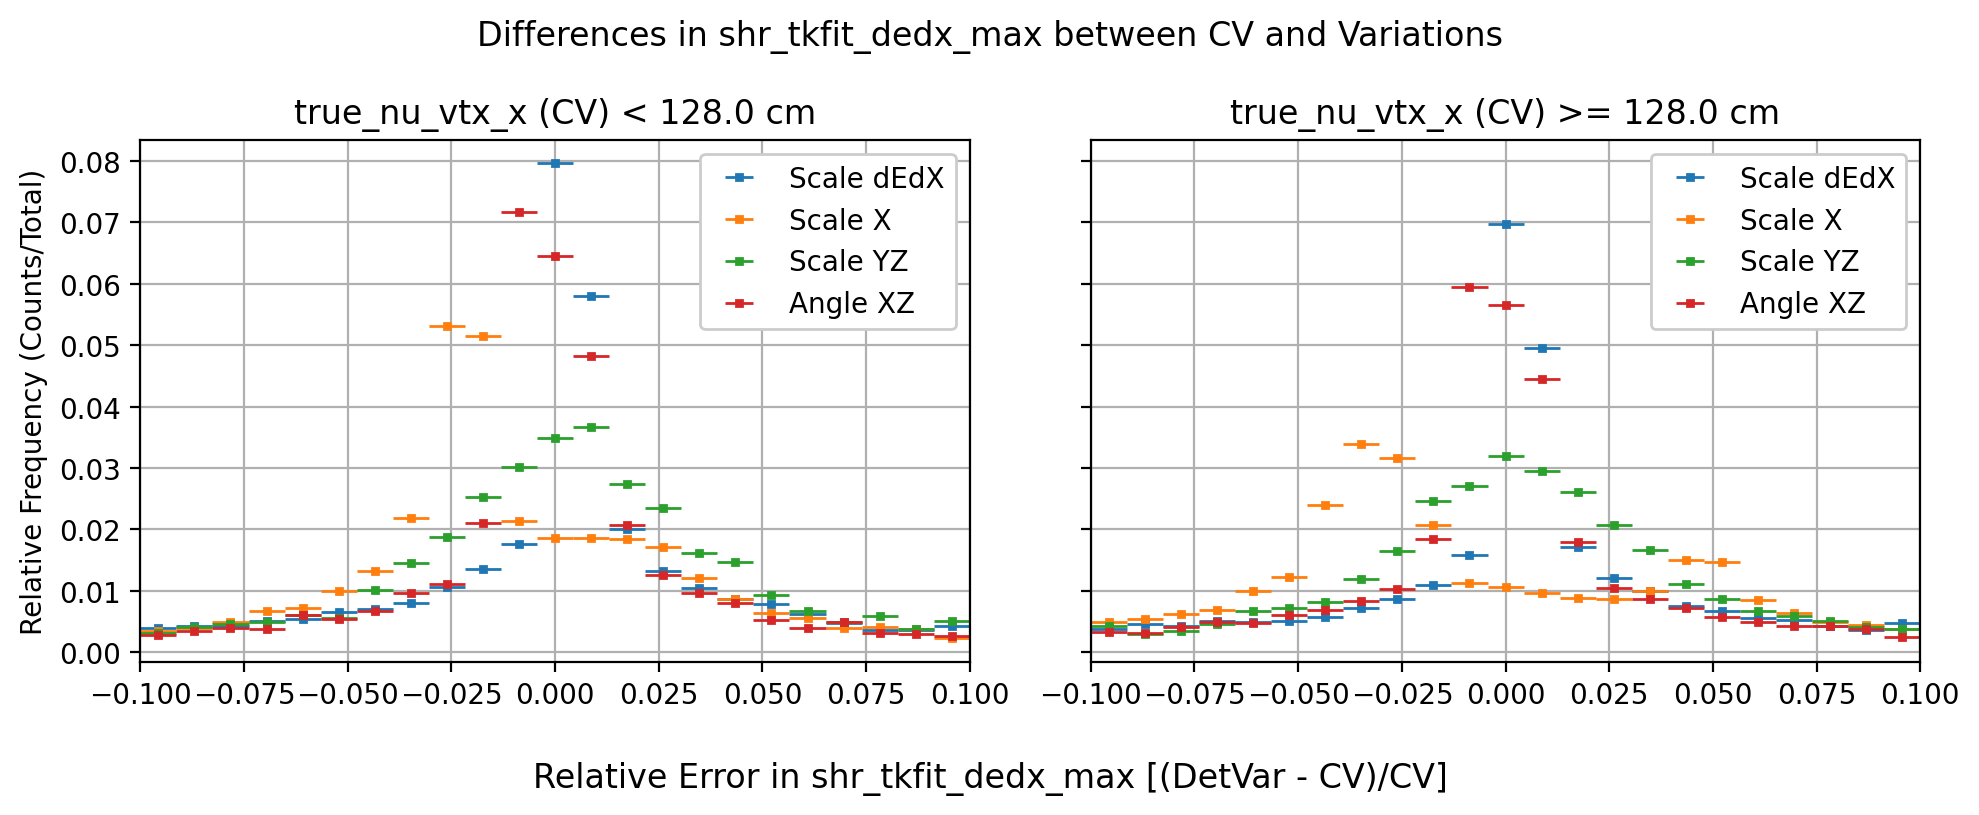

In [111]:
# Split just into two bins

fig, (less_ax, more_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4), dpi=200)

for i in range(len(df_list)-1):
    
    cv = df_list[-1].loc[filtered_shared_index[i]]
    less_index = cv[cv[direction] < split_plane].index
    more_index = cv[cv[direction] >= split_plane].index
    cv = cv[var]
    
    df = df_list[i].loc[filtered_shared_index[i]][var]
    df_less = df.loc[less_index]
    df_more = df.loc[more_index]

    less_rel_errors = ( df_less - cv ) / cv
    more_rel_errors = ( df_more - cv ) / cv
    
    hist = get_rel_frequencies(less_rel_errors, err_bins)
    less_ax.errorbar(err_bin_centers,hist,xerr=err_bin_width/2,ls='none',marker='s',ms=2.5,lw=1,label=plot_labels[i])
    
    hist = get_rel_frequencies(more_rel_errors, err_bins)
    more_ax.errorbar(err_bin_centers,hist,xerr=err_bin_width/2,ls='none',marker='s',ms=2.5,lw=1,label=plot_labels[i])
    
less_ax.grid(True)
more_ax.grid(True)
less_ax.legend(framealpha=1)
more_ax.legend(framealpha=1)
less_ax.set_xlim(min(err_bins), max(err_bins))
more_ax.set_xlim(min(err_bins), max(err_bins))
less_ax.set_title(f'{direction} (CV) < {split_plane} cm')
more_ax.set_title(f'{direction} (CV) >= {split_plane} cm')
less_ax.set_ylabel('Relative Frequency (Counts/Total)')
fig.supxlabel(f'Relative Error in {var} [(DetVar - CV)/CV]')
fig.suptitle(f'Differences in {var} between CV and Variations');

fig.tight_layout()


In [112]:


direction_index, direction_index_all = filter_index(pre_shared_index, pre_shared_index_all, [var], special=[special],exponent_threshold=5)
direction_index_all = filtered_shared_index_all

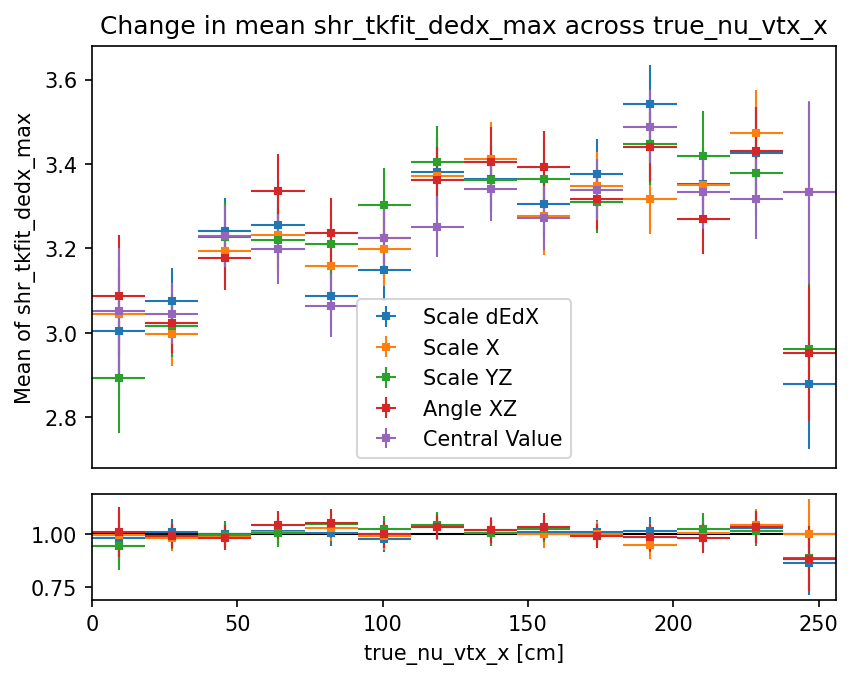

In [113]:
# Plot the mean of var based on the directional binning

fig = plt.figure(dpi=150)
gs = mpl.gridspec.GridSpec(2,1, height_ratios=[0.8, 0.2], wspace=0.2, hspace=0.1)

ax = fig.add_subplot(gs[0,:])
ratio_ax = fig.add_subplot(gs[1,:])

means = []
errors = []

for i in range(len(df_list)):
    
    df = df_list[i].loc[direction_index_all]
    
    df = df[df[var] > 0]
#     df = df[df[var] < 9999]
    
    cut = pd.cut(df[direction], split_bins)
    
    grouped = df[var].groupby(cut)
    
    mean = grouped.mean()
    std = grouped.std()
    counts = grouped.count()
    
    means.append(mean)
    errors.append(std/np.sqrt(counts))
    
    ax.errorbar(split_bin_centers,mean,xerr=split_bin_width/2,yerr=std/np.sqrt(counts), ls='none',marker='s',ms=2.5,lw=1,label=plot_labels[i])
    
ratio_ax.axhline(1, color='k', lw=1)    
    
for i in range(len(df_list)-1):
    
    combined_error = np.sqrt(errors[i]*errors[i]/means[-1] + errors[-1]*errors[-1]/means[i])
    
    ratio_ax.errorbar(split_bin_centers,means[i]/means[-1],xerr=split_bin_width/2,yerr=combined_error, ls='none',marker='s',ms=2.5,lw=1)
    
ax.set_xticks([])
ax.set_xlim(min(split_bins), max(split_bins))
ratio_ax.set_xlim(min(split_bins), max(split_bins))
ratio_ax.set_xlabel(f'{direction} [cm]')
ax.set_ylabel(f'Mean of {var}')
ax.set_title(f'Change in mean {var} across {direction}')
ax.legend()

## 2D Histograms between var and direction

In [183]:
selection_variation_index = 1

draw_box = True
rel_errors_bounds = [0.04, 0.06]
position_bounds = [100, 225]

# rel_errors_bounds = [-0.04, -0.01]
# position_bounds = [20, 225]

Text(0.5, 1.0, 'Relative Error Distribution as Detector Position Changes')

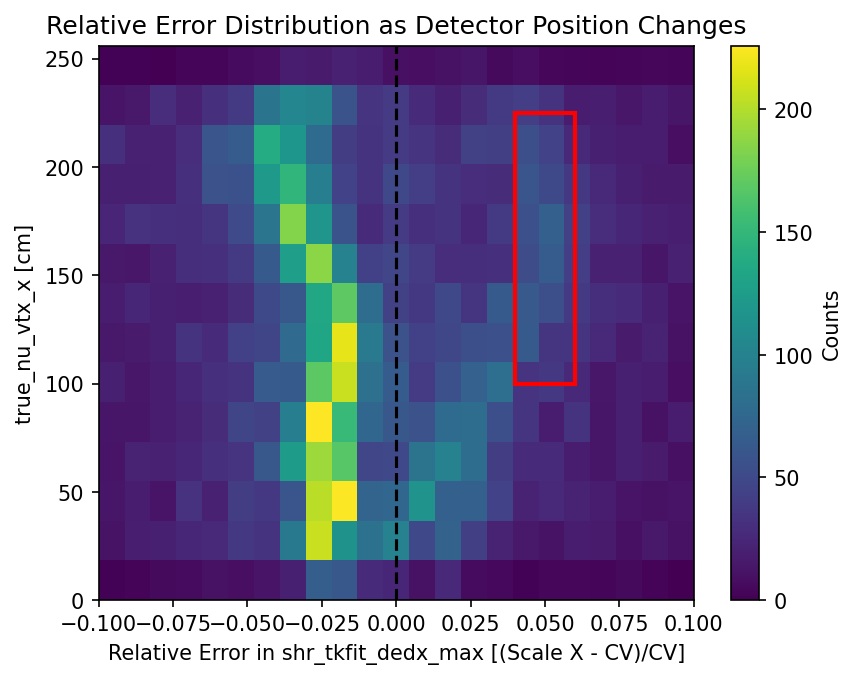

In [184]:
# 2d histogram for direction and rel error of var

df = df_list[selection_variation_index].loc[direction_index[selection_variation_index]]
cv = df_list[-1].loc[direction_index[selection_variation_index]]

values = df[var]
cv_values = cv[var]
positions = df[direction]

rel_errors = (values - cv_values) / cv_values

rel_error_index = rel_errors[(rel_errors > rel_errors_bounds[0]) & 
                             (rel_errors < rel_errors_bounds[1]) & 
                             (positions > position_bounds[0]) & 
                             (positions < position_bounds[1])].index
num_rel_error_box = len(rel_error_index)

fig, ax = plt.subplots(dpi=150)

_, _, _, im = ax.hist2d(rel_errors, positions, bins=[err_bins, split_bins])

if draw_box:
    
    rect = patches.Rectangle((rel_errors_bounds[0], position_bounds[0]), 
                             rel_errors_bounds[1]-rel_errors_bounds[0], 
                             position_bounds[1]-position_bounds[0], 
                             linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
ax.axvline(0, color='k', linestyle='--')

cbar = fig.colorbar(im)

cbar.set_label(f'Counts')

ax.set_ylabel(f'{direction} [cm]')
ax.set_xlabel(f'Relative Error in {var} [({plot_labels[selection_variation_index]} - CV)/CV]')

ax.set_title(f'Relative Error Distribution as Detector Position Changes')

Text(0.5, 1.0, 'shr_tkfit_dedx_max Distribution as Detector Position Changes')

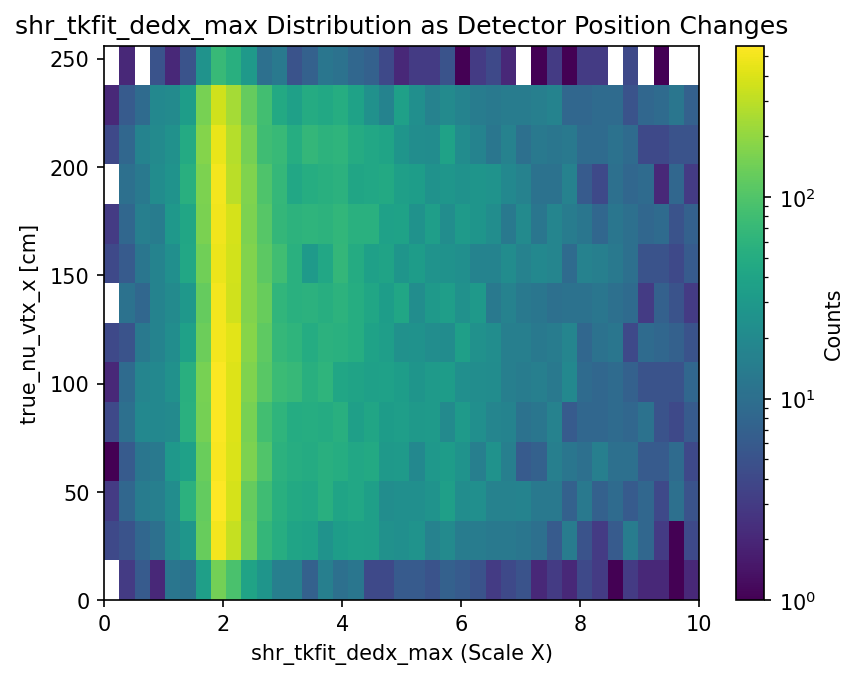

In [194]:
# 2d histogram for direction and var

hist_bins = np.linspace(0,10,40)

selection_variation_index = 1

df = df_list[selection_variation_index].loc[direction_index[selection_variation_index]]
# df = df_list[selection_variation_index].loc[rel_error_index]

values = df[var]
positions = df[direction]

fig, ax = plt.subplots(dpi=150)

_, _, _, im = ax.hist2d(values, positions, bins=[hist_bins, split_bins], norm=mpl.colors.LogNorm())

cbar = fig.colorbar(im)

cbar.set_label(f'Counts')

ax.set_ylabel(f'{direction} [cm]')
ax.set_xlabel(f'{var} ({plot_labels[selection_variation_index]})')

ax.set_title(f'{var} Distribution as Detector Position Changes')

Text(0.5, 1.0, 'shr_tkfit_dedx_max compared between CV and Scale X')

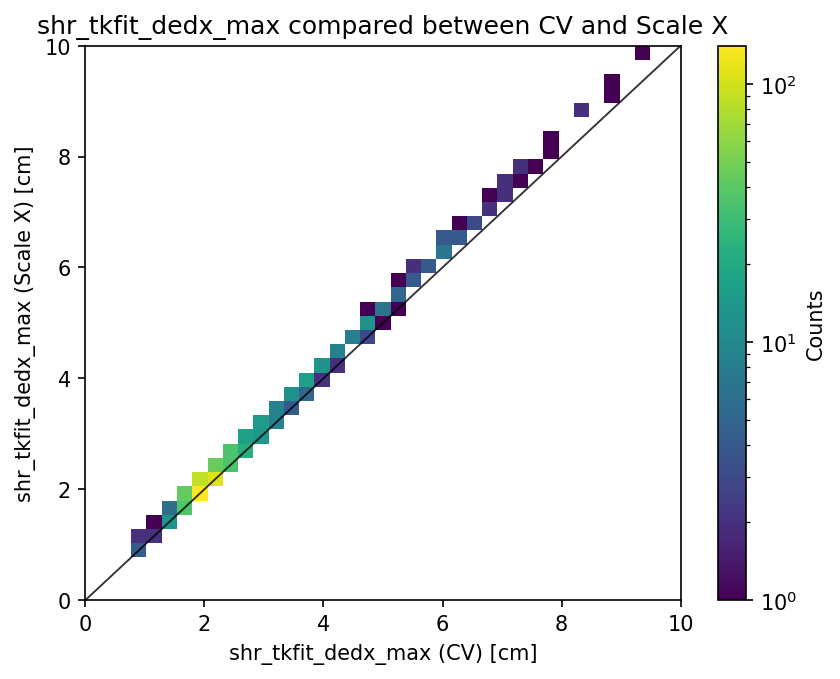

In [195]:
# 2d histogram for direction and var (just in box)

hist_bins = np.linspace(0,10,40)

selection_variation_index = 1

# df = df_list[selection_variation_index].loc[direction_index[selection_variation_index]]
df = df_list[selection_variation_index].loc[rel_error_index]
df_cv = df_list[-1].loc[rel_error_index]

values = df[var]
cv_values = df_cv[var]
# positions = df[direction]

fig, ax = plt.subplots(dpi=150)

_, _, _, im = ax.hist2d(cv_values, values, bins=[hist_bins, hist_bins], norm=mpl.colors.LogNorm())

cbar = fig.colorbar(im)

cbar.set_label(f'Counts')

ax.plot([min(hist_bins),max(hist_bins)], [min(hist_bins),max(hist_bins)], linestyle='-', c='k', linewidth=0.9, alpha=0.8)

ax.set_xlabel(f'{var} (CV) [cm]')
ax.set_ylabel(f'{var} ({plot_labels[selection_variation_index]}) [cm]')

ax.set_title(f'{var} compared between CV and {plot_labels[selection_variation_index]}')

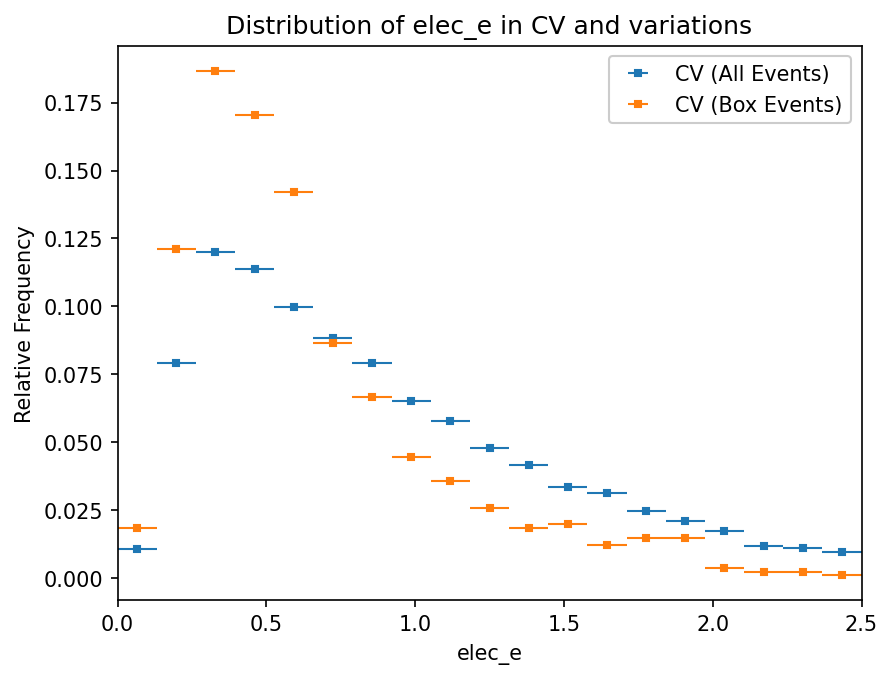

In [196]:
# 1d histogram in the second variable based on the box drawn for the first

fig, ax = plt.subplots(dpi=150)

hist = get_rel_frequencies(np.array(df_list[-1].loc[direction_index[selection_variation_index]][var2]), bins2)
ax.errorbar(bin_centers2,hist,xerr=bin_width2/2,ls='none',marker='s',ms=2.5,lw=1, label='CV (All Events)') #, edgecolor='black')

hist = get_rel_frequencies(np.array(df_list[-1].loc[rel_error_index][var2]), bins2)
ax.errorbar(bin_centers2,hist,xerr=bin_width2/2,ls='none',marker='s',ms=2.5,lw=1, label='CV (Box Events)')

for i in range(len(limits2)): 
    limit = limits2[i]
    if i == 0 : # Only add one label for multiple limits
        ax.axvline(limit, ls=':',c='k', label=f'{var} cut')
    else:
        ax.axvline(limit, ls=':',c='k')
    
ax.legend(framealpha=1)
ax.set_xlim(min(bins2), max(bins2))
ax.set_title(f'Distribution of {var2} in CV and variations')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel(f'{var2}');

## Preselection Comparison

('Nue', '9.10')
Before any filtering: [82746, 82619, 82615, 83416, 88471]
After basic filtering: [43827, 43807, 43718, 44084, 46817]
After pre-selection: [32950, 32950, 32967, 33246, 35308]
After cuts: [8756, 8889, 8728, 8869, 9437]
After pre-selection, the ratio of shared events between DetVar and CV is:
[0.6765007871859813, 0.6753030337617276, 0.6777299967976577, 0.6866890481807458, 0.7541704936241109]
('Nue', '9')
Before any filtering: [46624, 46624, 46619, 46619, 46619]
After basic filtering: [27614, 27614, 27611, 27611, 27611]
After pre-selection: [16811, 16736, 16874, 16929, 16853]
After cuts: [3019, 2902, 2947, 2969, 2969]
After pre-selection, the ratio of shared events between DetVar and CV is:
[0.5510248424712103, 0.5504092127181864, 0.5652819528448807, 0.5766180145594147, 0.6103726775560465]


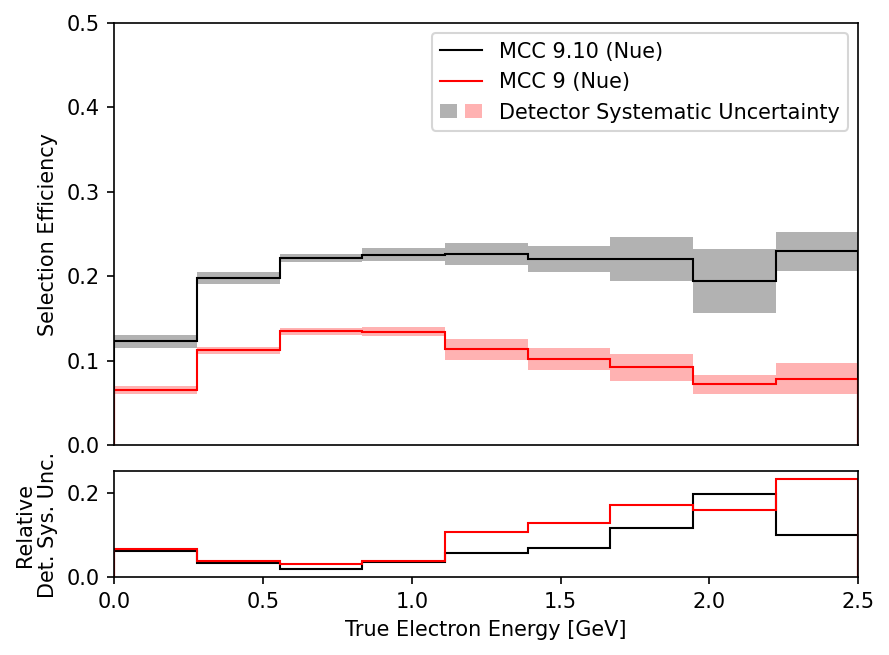

In [121]:
fig = plt.figure(dpi=150)
gs = mpl.gridspec.GridSpec(2,1, height_ratios=[0.8, 0.2], wspace=0.2, hspace=0.1)

cut_ax = fig.add_subplot(gs[0,:])
ratio_ax = fig.add_subplot(gs[1,:])

colors = ['k', 'r']
plots = [] # the stair plots
shaded_regions = [] # Shaded systematics regions (combined into a single legend entry)
labels = [] # Legend labels

for i in range(len(configs)):
    
    intersected_index_all, before_index, before_shared_index, before_shared_index_all, before_intersected_index, pre_index, pre_shared_index, pre_shared_index_all, pre_intersected_index, cut_index, cut_shared_index, cut_shared_index_all, cut_intersected_index = perform_cuts(i)
    
    # Calculate CV efficiency
    cv = df_lists[i][-1]
    before_hist = np.histogram(cv.loc[before_index[-1], ['elec_e']].to_numpy(), cut_bins)[0]
    after_hist = np.histogram(cv.loc[cut_index[-1], ['elec_e']].to_numpy(), cut_bins)[0]
    cv_cut_efficiency = after_hist/before_hist
    
    p = cut_ax.stairs(cv_cut_efficiency, cut_bins, 
                               ls='-',color=colors[i],lw=1,
                               label=f'CV ({configs[i][1]})')
    plots.append(p)
    labels.append(f'MCC {configs[i][1]} ({configs[i][0]})')
    
    # Calculate detector systematics from detvar
    errors = np.zeros(len(cv_cut_efficiency))
    for j in range(len(df_lists[i])):
        df = df_lists[i][j]
        
        before_hist = np.histogram(df.loc[before_index[j], ['elec_e']].to_numpy(), cut_bins)[0]
        after_hist = np.histogram(df.loc[cut_index[j], ['elec_e']].to_numpy(), cut_bins)[0]
        
        cut_efficiency = after_hist/before_hist
        
        errors += np.abs(cut_efficiency - cv_cut_efficiency)*np.abs(cut_efficiency - cv_cut_efficiency)
        
    errors = np.sqrt(errors)
    
    p = cut_ax.bar(cut_bin_centers, 2 * errors, bottom = cv_cut_efficiency - errors, width = cut_bin_width, color=colors[i], alpha=0.3, label='Detector Systematics')
    shaded_regions.append(p)    
        
    ratio_ax.stairs(errors/cv_cut_efficiency, cut_bins, ls='-',color=colors[i],lw=1)
    
cut_ax.set_xlim(min(cut_bins), max(cut_bins))
cut_ax.set_ylim(0,0.5)
ratio_ax.set_xlim(min(cut_bins), max(cut_bins))
ratio_ax.set_ylim(0,0.25)

cut_ax.set_ylabel(r'Selection Efficiency')
ratio_ax.set_ylabel(f'Relative\nDet. Sys. Unc.')
ratio_ax.set_xlabel(f'True Electron Energy [GeV]')

cut_ax.set_xticks([])

plots.append(tuple(shaded_regions))
labels.append('Detector Systematic Uncertainty')

cut_ax.legend(plots, labels, handler_map={tuple: HandlerTuple(ndivide=None)})
        